## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Exploratory data analysis

In [44]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
#observe the different feature type present in the data
data_stats = df.describe()
data_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


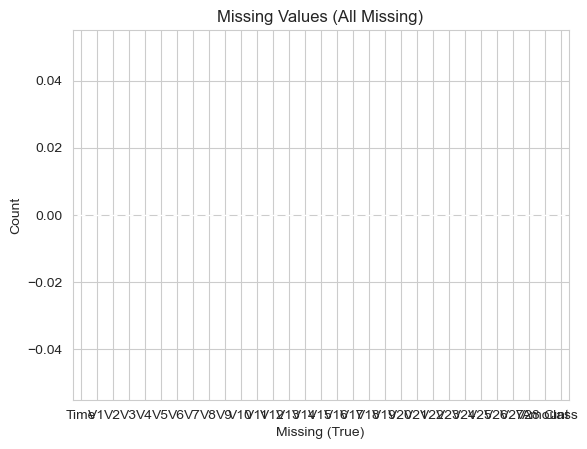

In [46]:
# 1. Check for missing values
missing_values = df.isnull().sum()
# print("Missing values in each column:\n", missing_values)
missing_values.plot(kind='bar', color='red')
plt.title('Missing Values (All Missing)')
plt.xlabel('Missing (True)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Columns with high variance:
 Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
Amount      250.120109
Name: std, dtype: float64


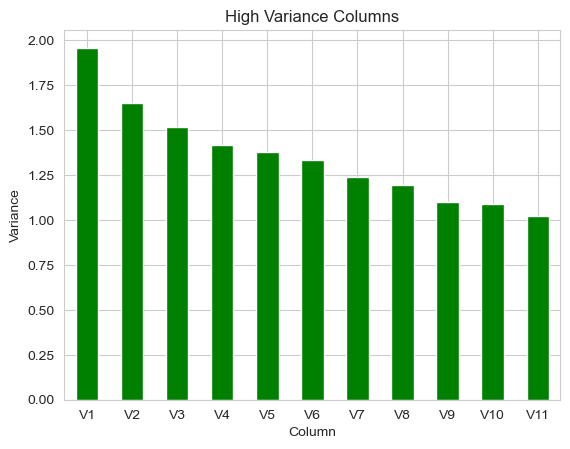

In [47]:
# 2. Identify columns with high variance
high_variance_columns = data_stats.loc['std'][data_stats.loc['std'] > 1.0]
print("Columns with high variance:\n", high_variance_columns)
high_variance_columns.drop(['Time', 'Amount']).plot(kind='bar', color='green')
plt.title('High Variance Columns')
plt.xlabel('Column')
plt.ylabel('Variance')
plt.xticks(rotation=0)
plt.show()

PCA-transformed features (V1 to V11) may already be scaled

Feature Importance:
High variance in PCA-transformed features (V1 to V11) suggests they may be important predictors for fraud detection.
Feature selection techniques can help identify the most relevant features.

Outlier Detection:
High variance in Amount and Time may indicate the presence of outliers. These should be analyzed further to determine their impact on the model.

Skewness of each column:
 Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


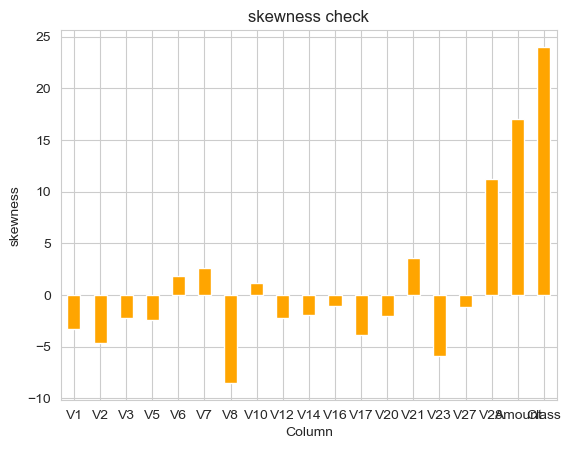

Significantly skweed columns Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
V1        -3.280667
V2        -4.624866
V3        -2.240155
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V10        1.187141
V12       -2.278401
V14       -1.995176
V16       -1.100966
V17       -3.844914
V20       -2.037155
V21        3.592991
V23       -5.875140
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


In [48]:
# 3. Check for skewness in the data
skewness = df.skew()
print("Skewness of each column:\n", skewness)
significant_skewness = skewness[abs(skewness) > 1]
significant_skewness.plot(kind='bar', color='orange')
plt.title('skewness check')
plt.xlabel('Column')
plt.ylabel('skewness')
plt.xticks(rotation=0)
plt.show()
print("Significantly skweed columns", significant_skewness.index)
print(significant_skewness)


Inference:

Class Balancing is needed to Address the extreme skewness in the Class column using oversampling techniques like SMOTE or ADASYN.

Here we will observe the distribution of our classes

In [49]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [50]:
print(normal_share, fraud_share)

99.82725143693798 0.1727485630620034


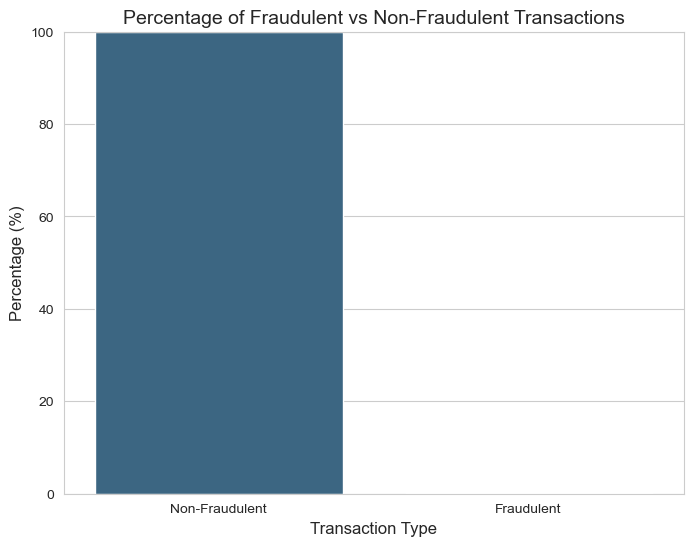

In [51]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['Non-Fraudulent', 'Fraudulent'], 
    y=[normal_share, fraud_share], 
    hue=['Non-Fraudulent', 'Fraudulent'],  # Assign x variable to hue
    palette='viridis', 
    legend=False  # Disable legend
)
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylim(0, 100)
plt.show()


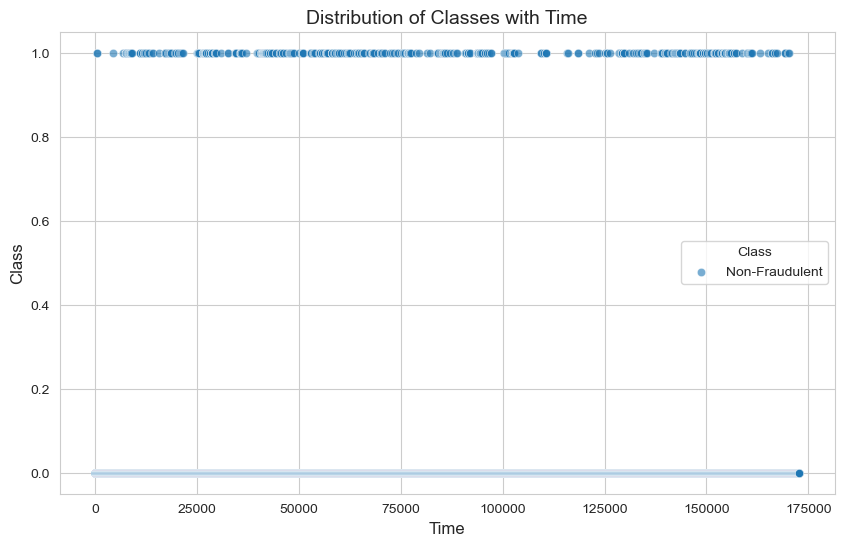

In [52]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Time'], 
    y=df['Class'],
    alpha=0.6
)
plt.title('Distribution of Classes with Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

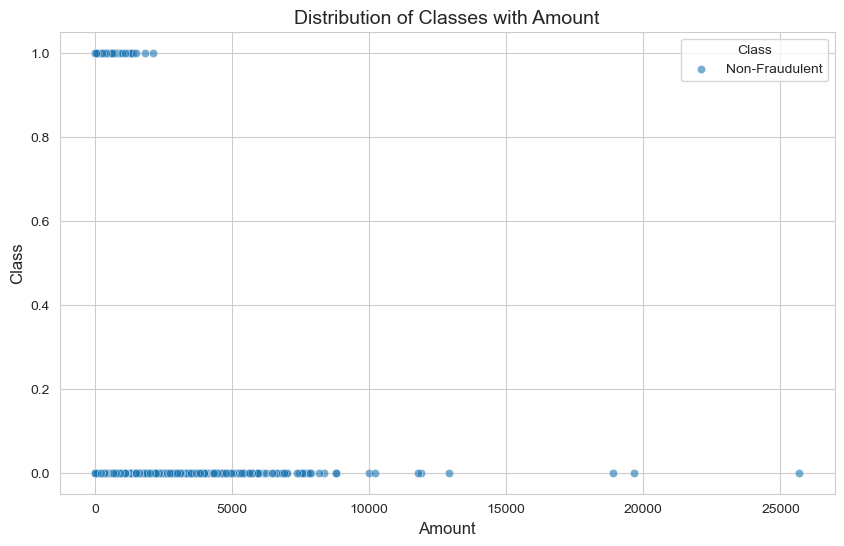

In [53]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Amount'], 
    y=df['Class'],
    alpha=0.6
)
plt.title('Distribution of Classes with Amount', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

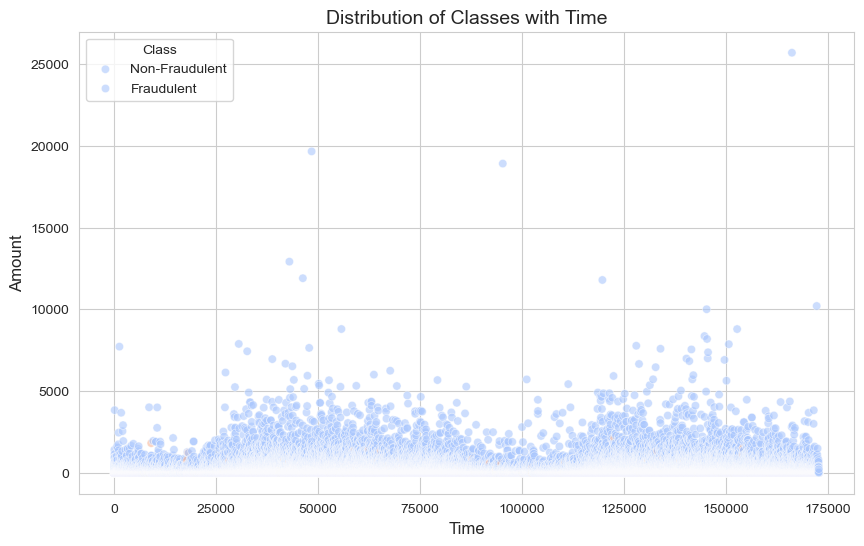

In [54]:
# Scatter plot to observe the distribution 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Time'], 
    y=df['Amount'], 
    hue=df['Class'], 
    palette='coolwarm', 
    alpha=0.6
)
plt.title('Distribution of Classes with Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

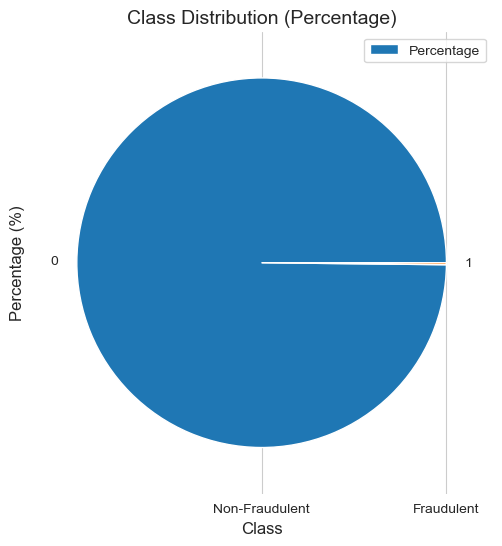

In [55]:
# Calculate the percentage distribution of the 'Class' field
class_percentages = (df['Class'].value_counts(normalize=True) * 100)

# Plot the bar chart
plt.figure(figsize=(8, 6))
class_percentages.plot(kind='pie', color=['blue', 'orange'])
plt.title('Class Distribution (Percentage)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.legend(['Percentage'])
plt.show()

In [56]:
class_percentages

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.




Lets analyse the transcation in time

In [57]:
class_0 = df.query('Class == 0')["Time"]
class_1 = df.query('Class == 1')["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')



1. Fraudulent transactions have a more even distribution compared to valid transactions.  
2. They are equally distributed over time, including during periods of low real transaction activity, such as nighttime in the European timezone.  
3. Further analysis is needed to examine the time distribution of transactions for both classes.  
4. Additionally, aggregated values of transaction count and amount per hour should be analyzed.  
5. Based on observations, it is assumed that the time unit in the dataset is measured in seconds.  

In [58]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
data_df = pd.DataFrame(tmp)
data_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
data_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


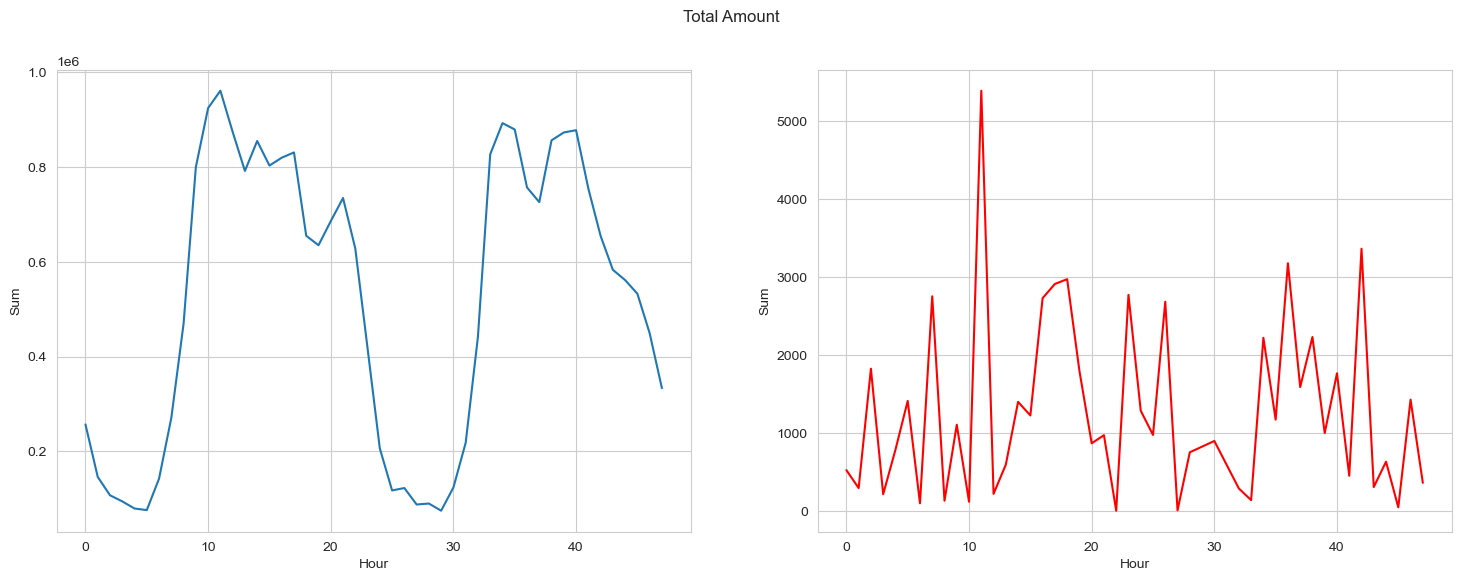

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

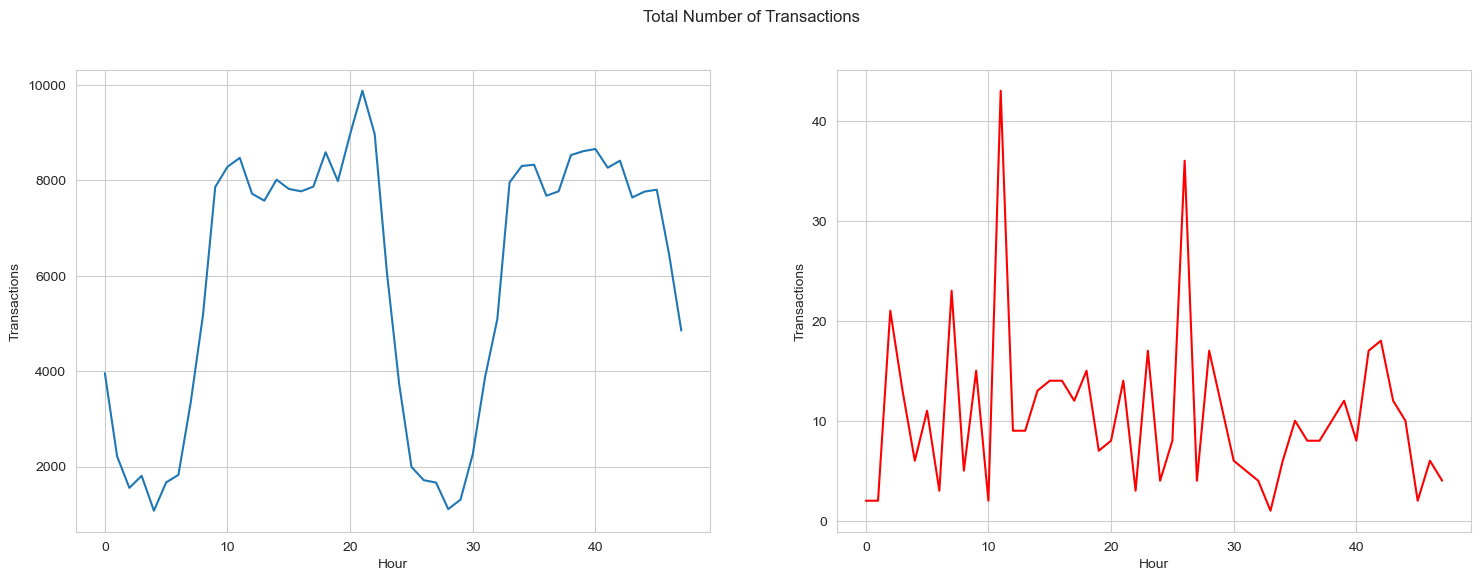

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

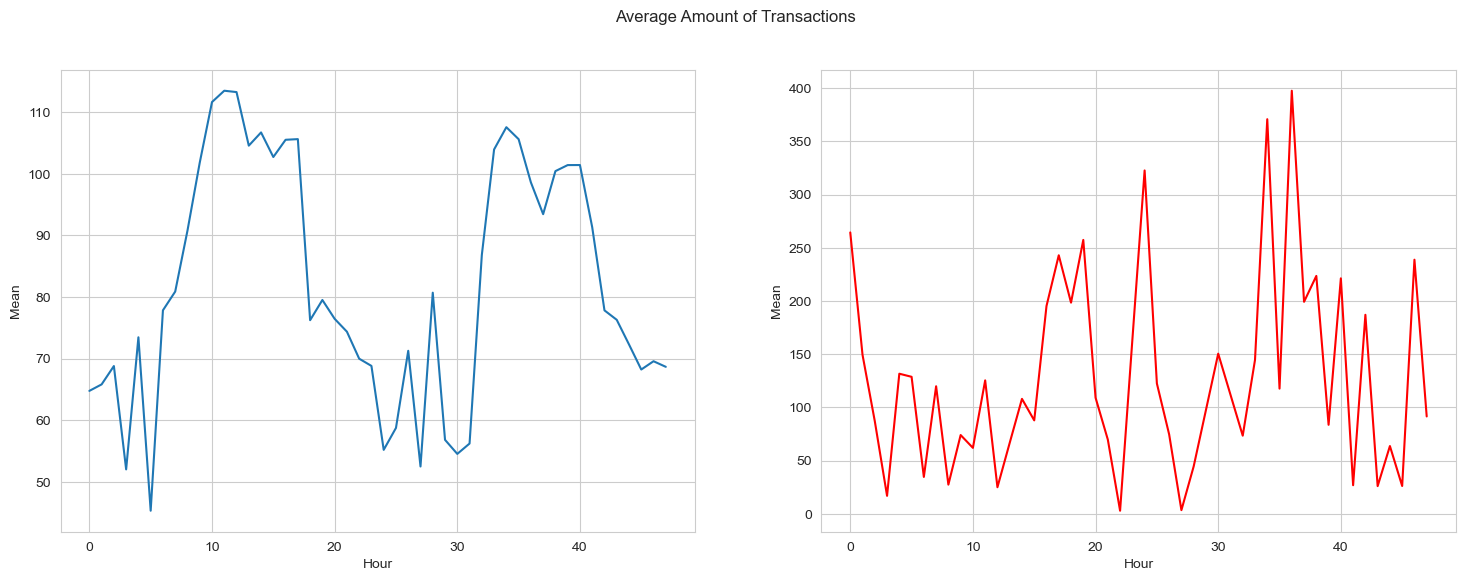

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

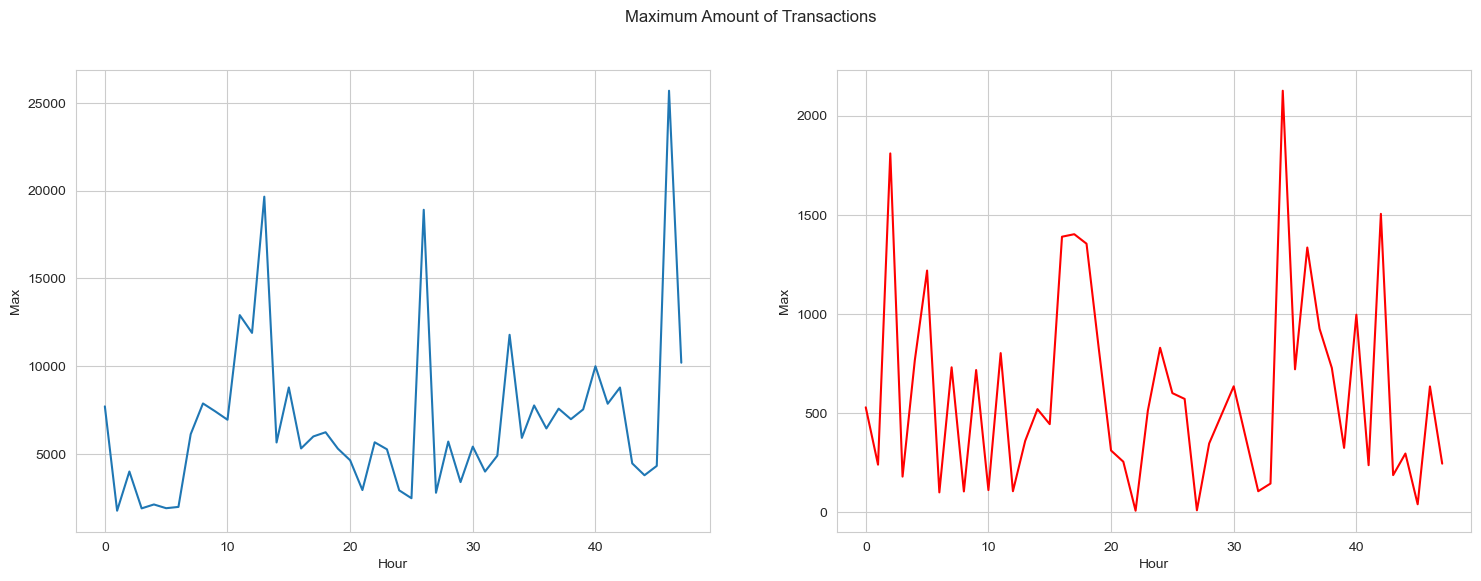

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

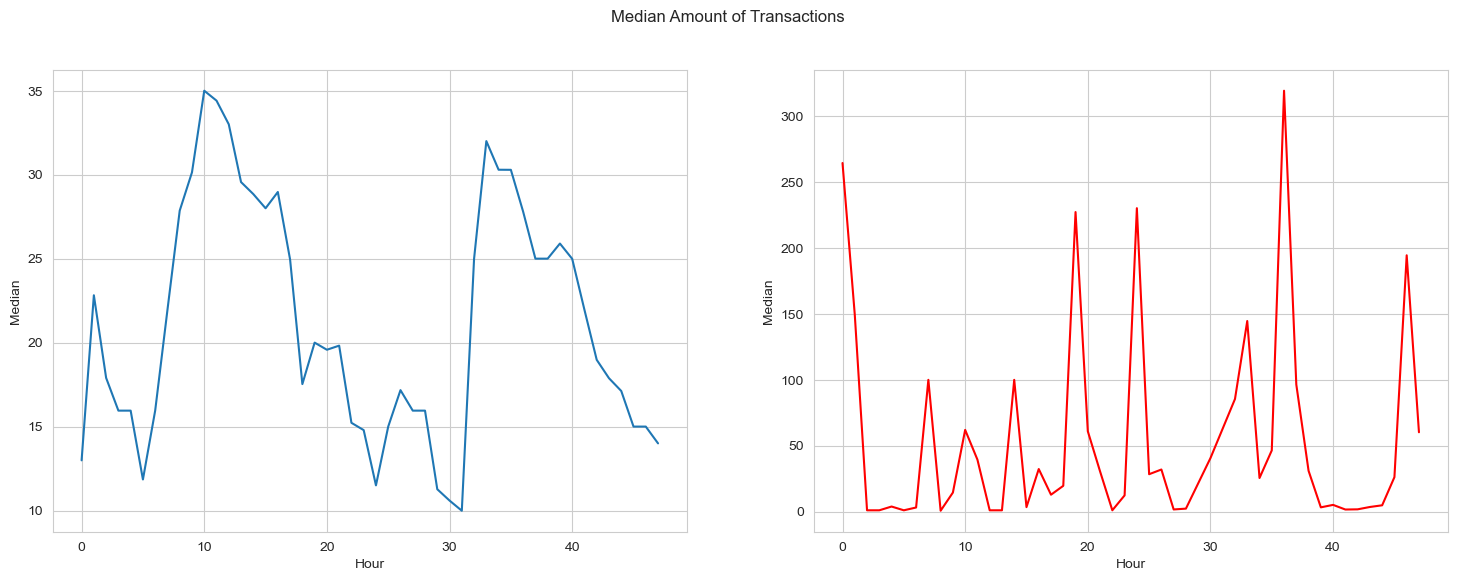

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

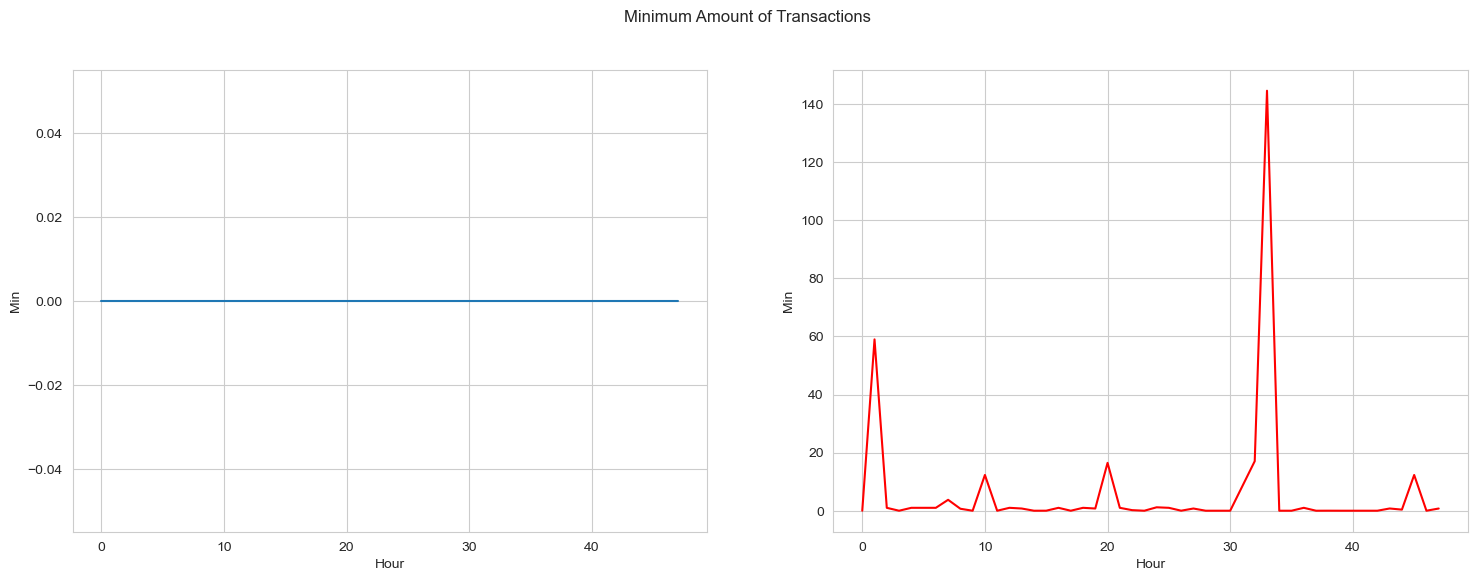

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=data_df.loc[data_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=data_df.loc[data_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

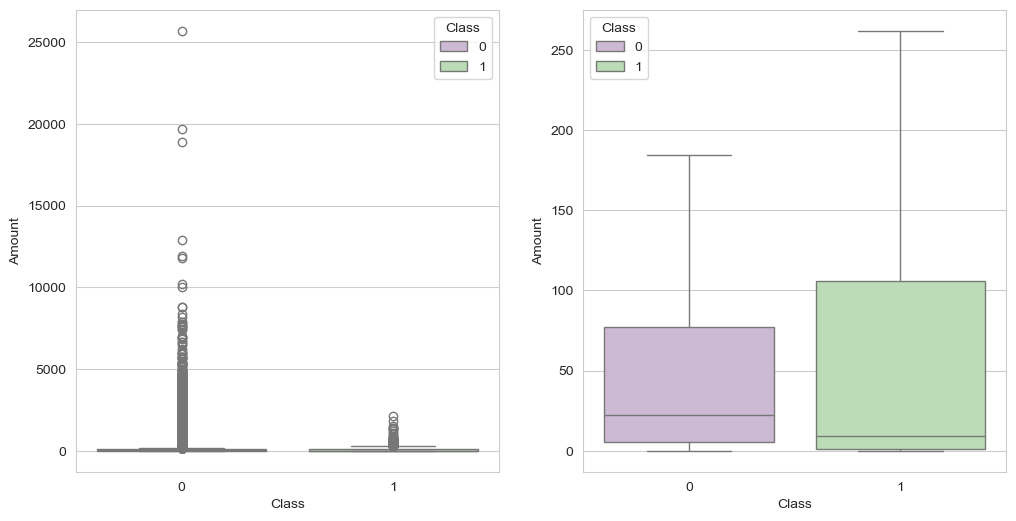

In [65]:
# Transactions amount

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [66]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [67]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

- Real transactions have:  
  - A larger mean value.  
  - A larger Q1 (first quartile).  
  - Smaller Q3 (third quartile) and Q4 (fourth quartile).  
  - Larger outliers.  

- Fraudulent transactions have:  
  - A smaller Q1 and mean value.  
  - A larger Q4 (fourth quartile).  
  - Smaller outliers.  

- Next steps:  
  - Plot fraudulent transactions (amount) against time.  
  - Time is measured in seconds from the start of the time period (total duration: 48 hours, spanning 2 days).  
  

In [68]:
fraud = df.query('Class == 1')

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')


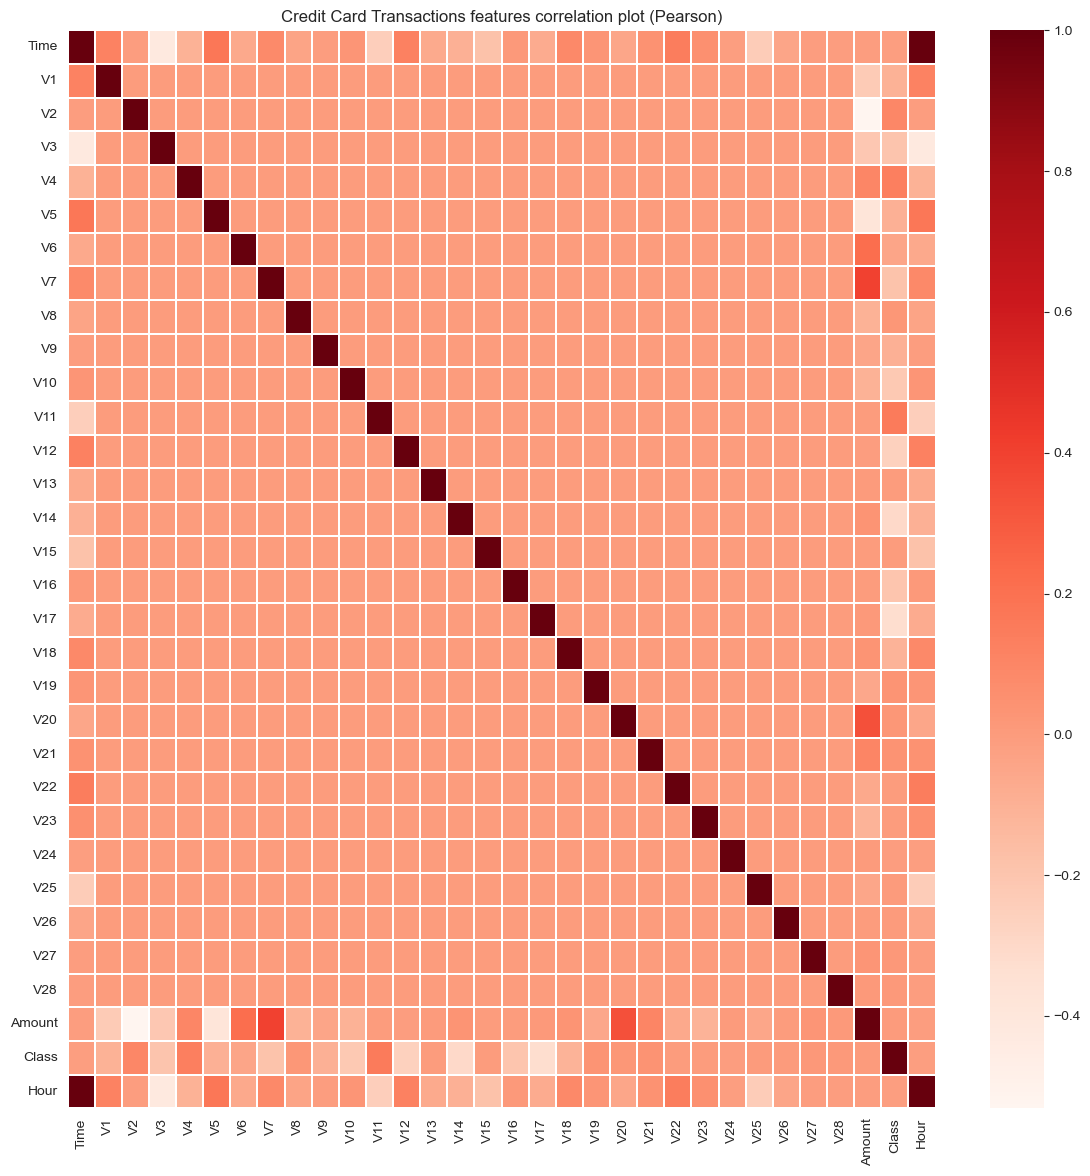

In [69]:
# Feature coorelation

plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [70]:
# Find redundant features based on high correlation
threshold = 0.9  # Define the correlation threshold
redundant_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            redundant_features.add(corr.columns[i])

print("Redundant features:", redundant_features)

Redundant features: {'Hour'}


- There is no significant correlation between the features V1 to V28, as expected.  
- Certain features show correlations with **Time** and **Amount**:  
  - **Time**:  
    - Inverse correlation with **V3**.  
  - **Amount**:  
    - Direct correlation with **V7** and **V20**.  
    - Inverse correlation with **V1** and **V5**.  
    

In [71]:
# Drop unnecessary columns

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### Splitting the data into train & test data

In [72]:
y= df[[target]]#class variable

TEST_SIZE = 0.20
RANDOM_STATE = 42

In [73]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df[predictors], df[target], test_size= TEST_SIZE, random_state=RANDOM_STATE, shuffle=True, stratify=y)


Using stratify=y will ensure that 10% of the training and test sets also belong to the minority class.

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [74]:
print(np.sum(y, axis=0))
print(np.sum(y_train, axis=0))
print(np.sum(y_test, axis=0))

Class    492
dtype: int64
394
98


### Plotting the distribution of a variable

<Figure size 640x480 with 0 Axes>

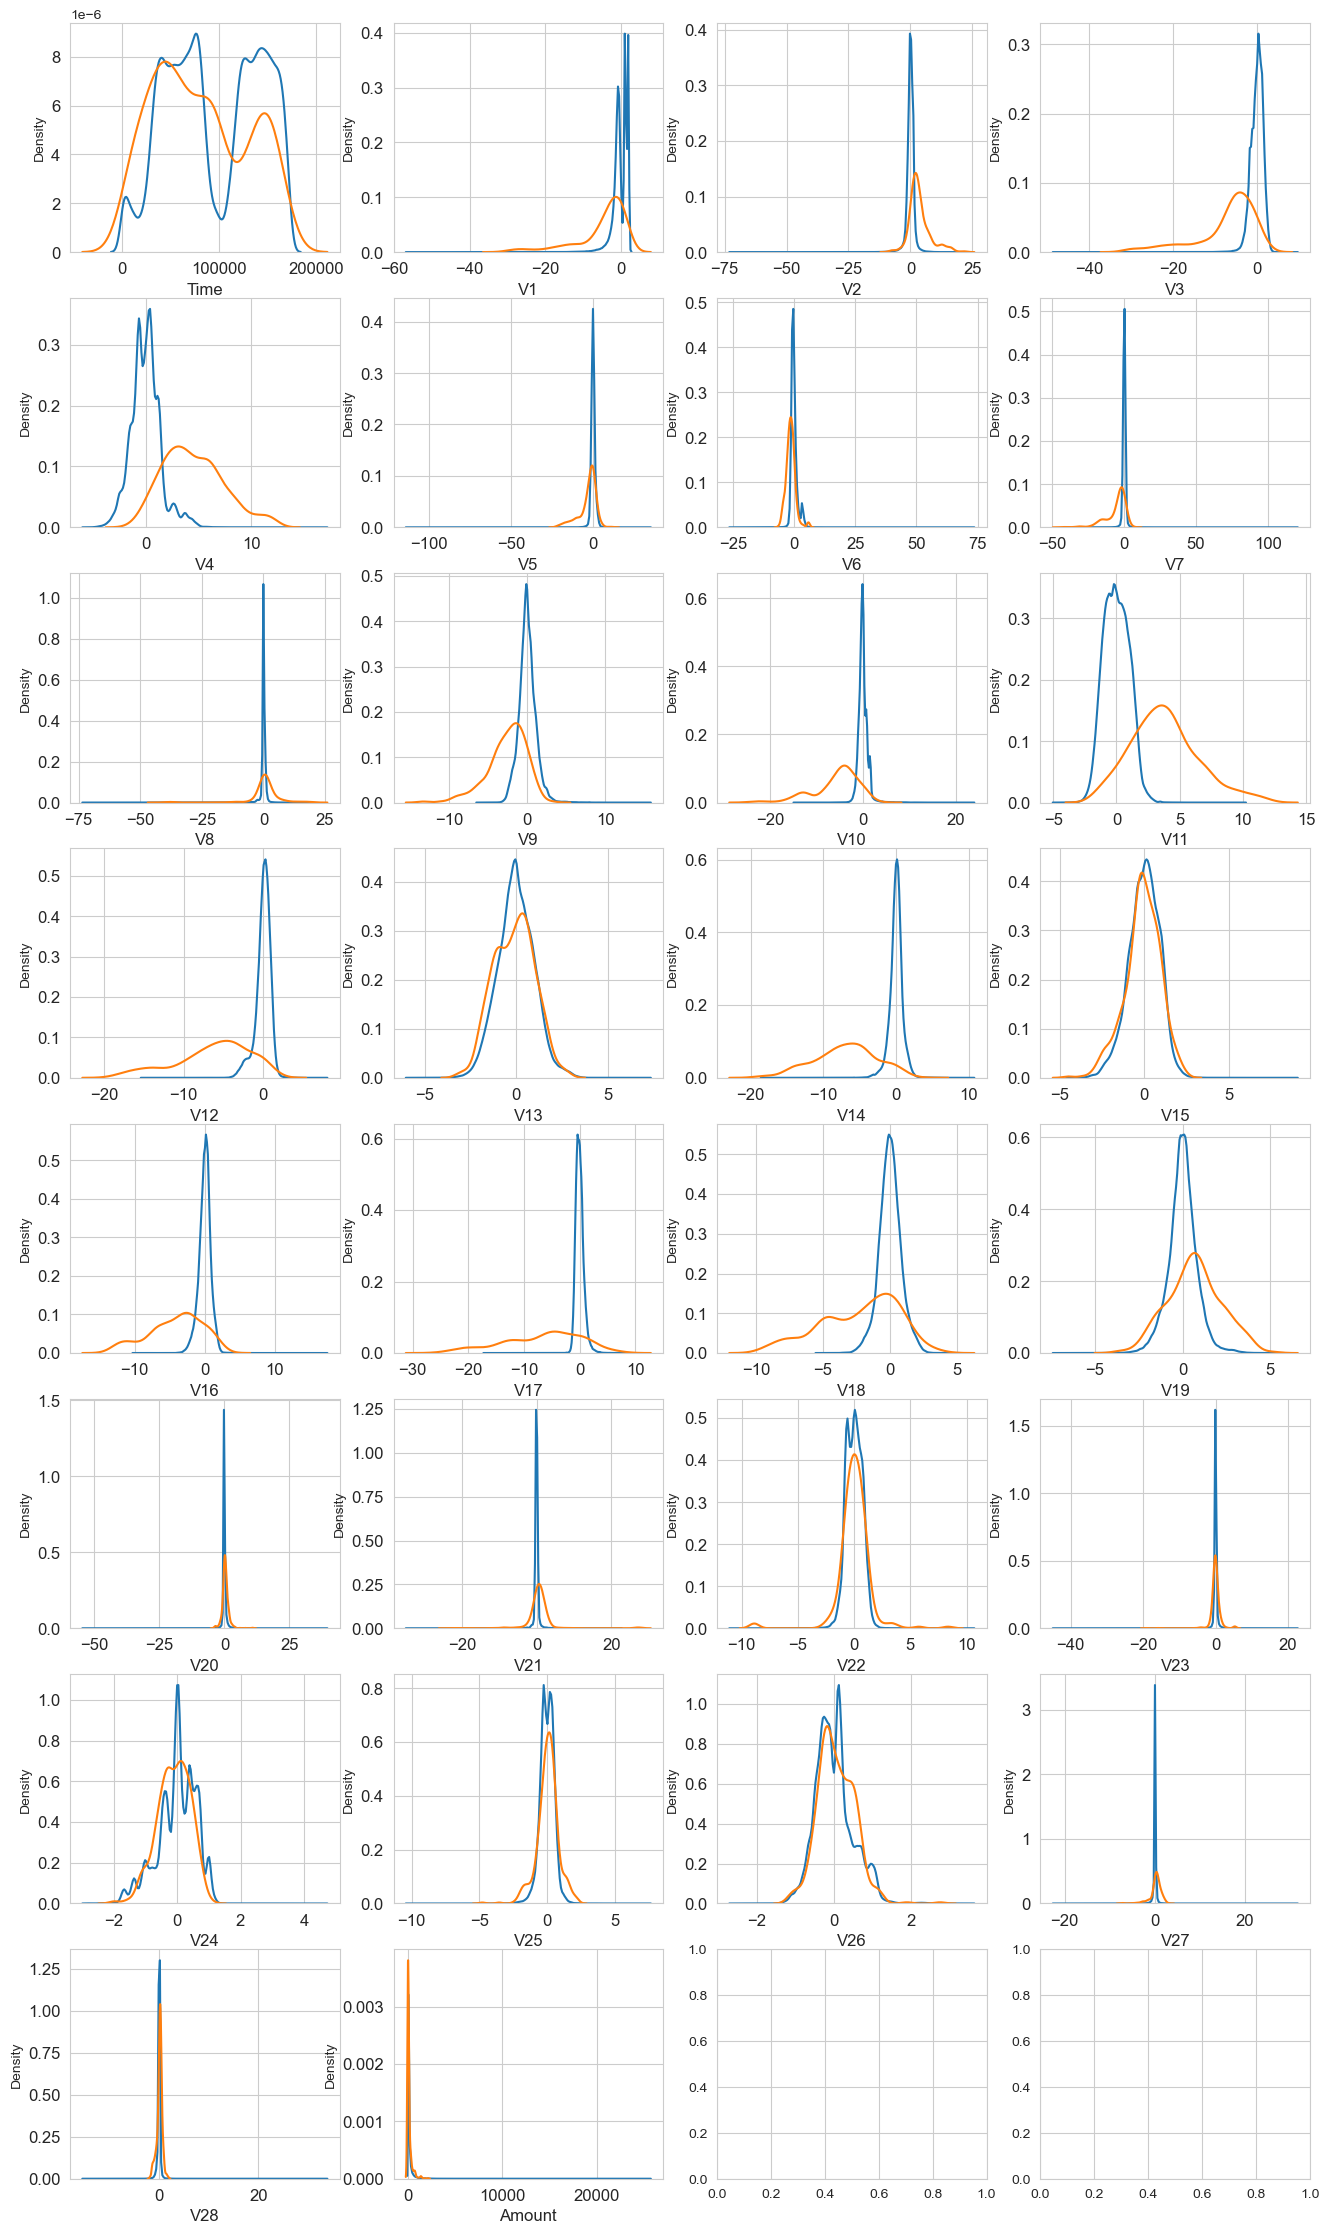

In [75]:
# plot the histogram of a variable from the dataset to see the skewness

var = predictors

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], label="Class = 0")
    sns.kdeplot(t1[feature],label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

1. Features with Clear Separation:
    V4 and V11 show clearly separated distributions for Class values 0 and 1.
2. Features with Partial Separation:
    V12, V14, and V18 exhibit partially separated distributions for Class values 0 and 1.
3. Features with Distinct Profiles:
    V1, V2, V3, and V10 have distinct profiles for the two Class values.
4. Features with Similar Profiles:
    V25, V26, and V28 have similar distributions for Class values 0 and 1.
5. Features with Similar Profiles:
    V25, V26, and V28 have similar distributions for Class values 0 and 1.

General Observations:

1. For legitimate transactions (Class = 0), most feature distributions are centered around 0, often with a long tail at one extremity.
2. For fraudulent transactions (Class = 1), the distributions are typically skewed (asymmetric).
3. Exceptions to this pattern include Time and Amount, which have unique distribution characteristics.

<Figure size 640x480 with 0 Axes>

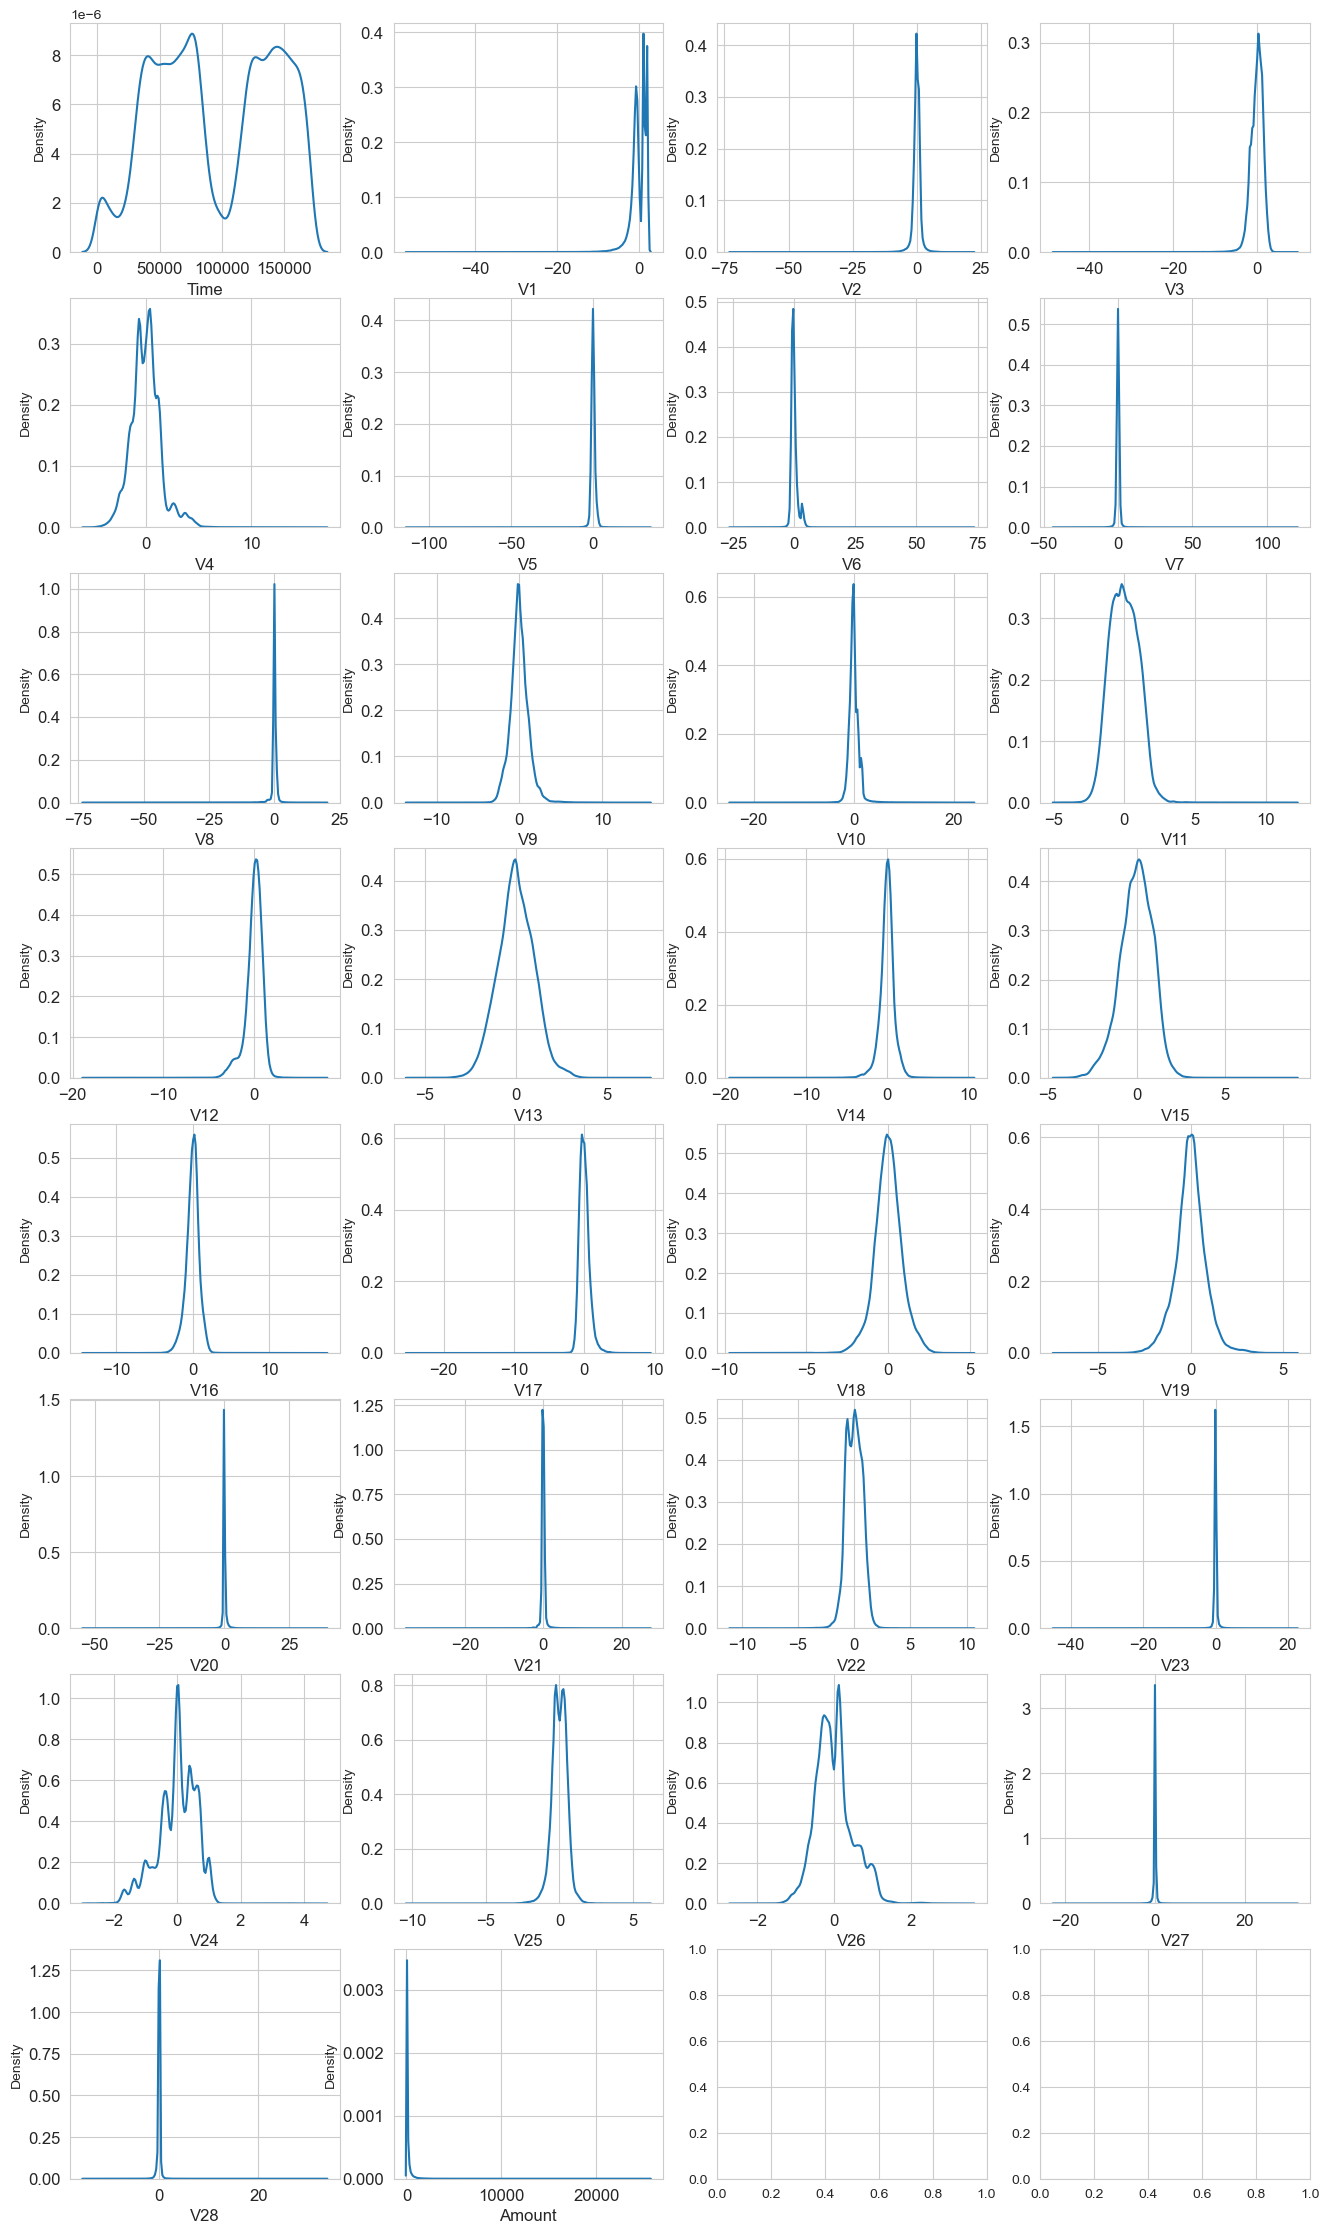

In [76]:
var = predictors

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(X_train[feature],label=feature)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [77]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[predictors] = pt.fit_transform(X_train)


# Transform the test set
X_test[predictors] = pt.transform(X_test)


<Figure size 640x480 with 0 Axes>

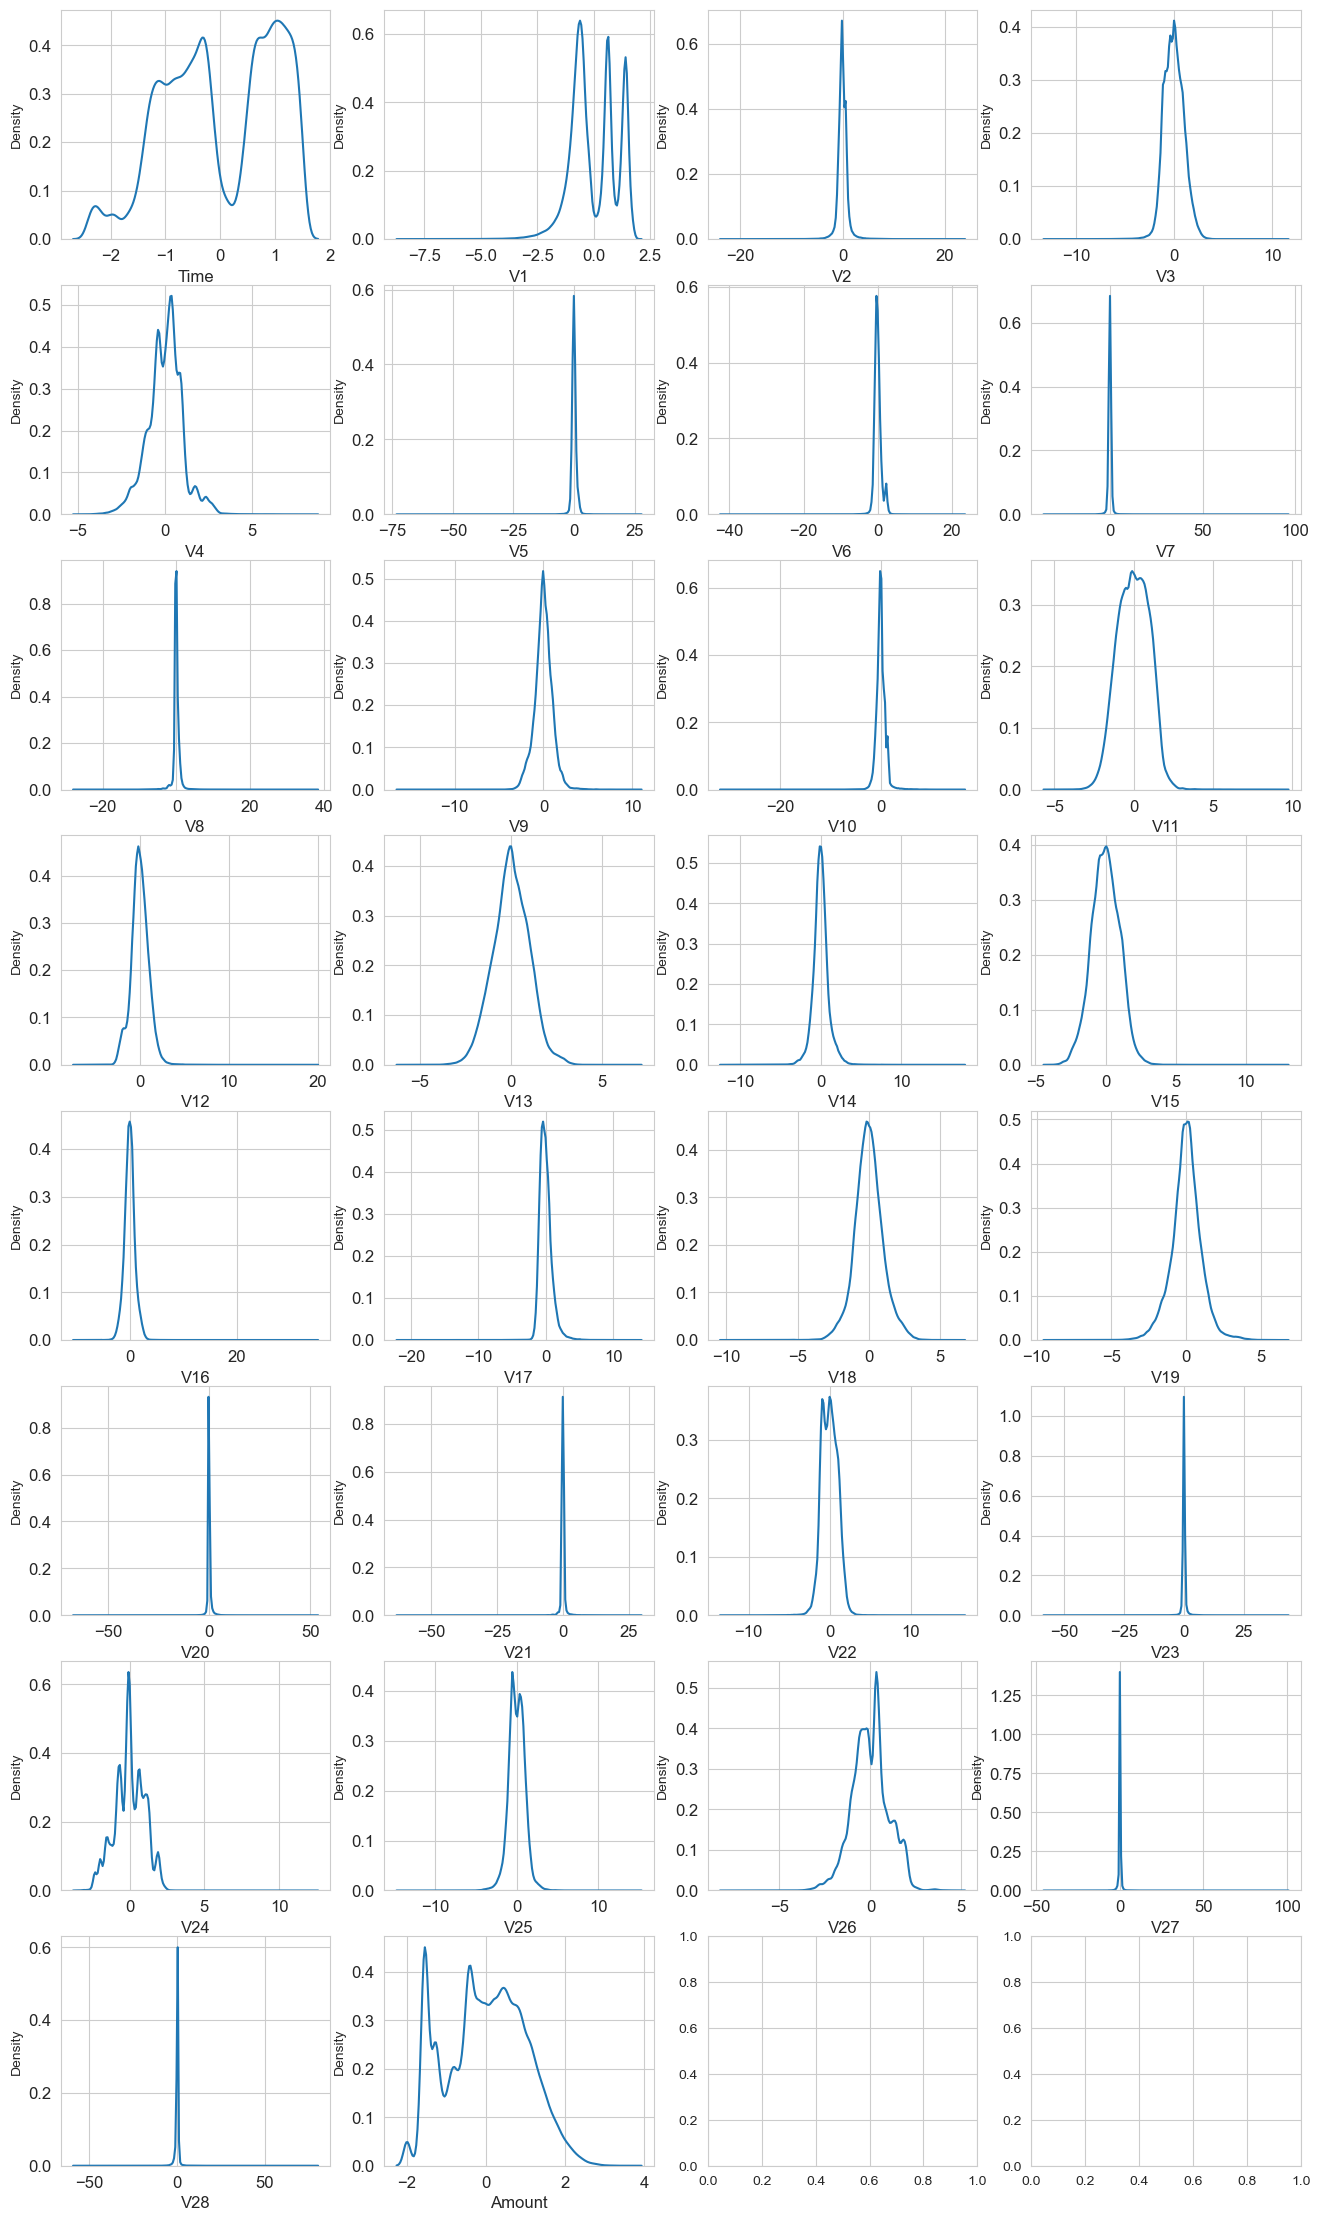

In [78]:
# plot the histogram of a variable from the dataset again to see the result 
var = predictors

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(X_train[feature],label=feature)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

## Model Building
- Build different models on the imbalanced dataset and see the result

In [79]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

num_C = [0.01, 0.1, 1, 10, 100, 1000]  #--> list of values
cv_num = cv_num = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  #--> list of values

# Model initialization with class balancing
model = linear_model.LogisticRegressionCV(
    Cs=num_C,
    cv=cv_num,
    penalty='l2',  # Ridge regularization [2]
    solver='lbfgs',
    max_iter=1000,
    class_weight= None,  # Crucial for imbalanced data [6][7]
    scoring='recall',  # Prioritize fraud detection [1][5]
    random_state=42
)

# Model training
model.fit(X_train, y_train)


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100, 1000],
                     cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                     max_iter=1000, random_state=42, scoring='recall')

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [80]:
# Stratified split to maintain class distribution
from sklearn.model_selection import train_test_split

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [81]:
y_pred_imb = model.predict(X_test_cv)
#perform cross validation
# Cross validationis performed above using cv_num
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

print("Best C:", model.C_[0]) #Optimum value of c[5]
print("Confusion Matrix:\n", confusion_matrix(y_test_cv, y_pred_imb))
print("Classification Report:\n", classification_report(y_test_cv, y_pred_imb))



Best C: 0.1
Confusion Matrix:
 [[45484     6]
 [   37    42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.88      0.53      0.66        79

    accuracy                           1.00     45569
   macro avg       0.94      0.77      0.83     45569
weighted avg       1.00      1.00      1.00     45569



ROC CURVE for results of Logistic Regression on Imbalanced data

In [82]:
from sklearn.metrics import roc_curve, auc
fpr_imb, tpr_imb, _ = roc_curve(y_test_cv, y_pred_imb)
roc_auc_imb = auc(fpr_imb, tpr_imb)

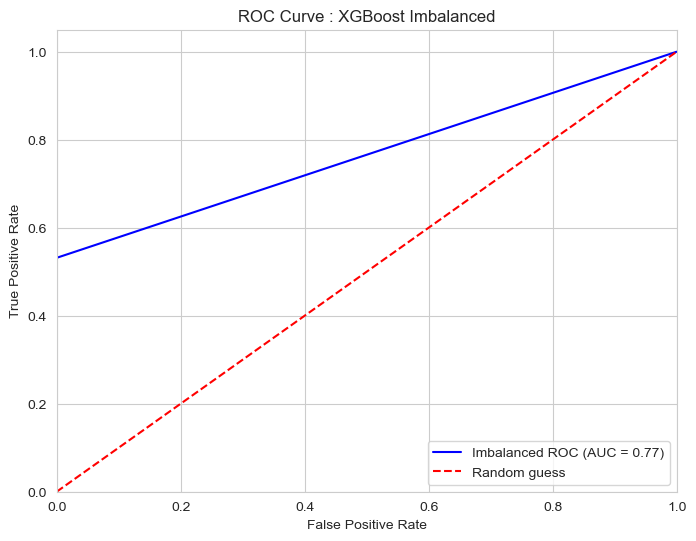

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_imb, tpr_imb, color='blue', label=f'Imbalanced ROC (AUC = {roc_auc_imb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : XGBoost Imbalanced')
plt.legend(loc="lower right")
plt.show()

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [84]:
import numpy as np

neg = np.sum(y_train_cv == 0)
pos = np.sum(y_train_cv == 1)
scale_pos_weight = neg / pos

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [100, 200],
    'scale_pos_weight': [scale_pos_weight]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # Focus on recall for fraud detection
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_cv, y_train_cv)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:33:41] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:33:41] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:33:41] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [577.6539682539683]},
             scoring='recall', verbose=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test_cv)

print("=== XGBoost Imbalanced Data ===")
print("Best Hyperparameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test_cv, y_pred))
print("Classification Report:\n", classification_report(y_test_cv, y_pred))


=== XGBoost Imbalanced Data ===
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 577.6539682539683}
Confusion Matrix:
 [[45240   250]
 [   12    67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     45490
           1       0.21      0.85      0.34        79

    accuracy                           0.99     45569
   macro avg       0.61      0.92      0.67     45569
weighted avg       1.00      0.99      1.00     45569



ROC curve for XGBoost model for Imbalanced data

In [87]:
from sklearn.metrics import roc_curve, auc
fpr_imb, tpr_imb, _ = roc_curve(y_test_cv, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)

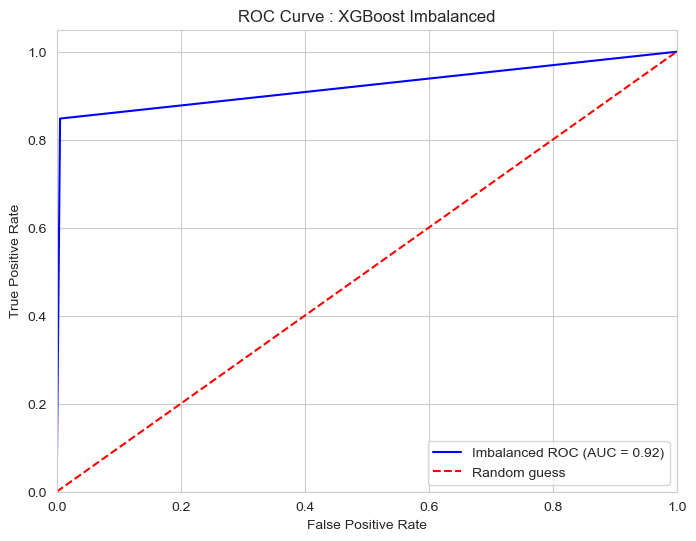

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_imb, tpr_imb, color='blue', label=f'Imbalanced ROC (AUC = {roc_auc_imb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : XGBoost Imbalanced')
plt.legend(loc="lower right")
plt.show()

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

# XGBoost / GridSearch model has better performance and th best hyperparameter is identified above steps. So we continue with XGBootst model

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [100, 200],
    'scale_pos_weight': [scale_pos_weight]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # Focus on recall for fraud detection
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:42:54] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:42:54] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:42:54] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [577.6539682539683]},
             scoring='recall', verbose=1)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test)

print("=== XGBoost Imbalanced Data ===")
print("Best Hyperparameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== XGBoost Imbalanced Data ===
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 577.6539682539683}
Confusion Matrix:
 [[56485   379]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [92]:
from sklearn.metrics import roc_curve, auc
fpr_imb, tpr_imb, _ = roc_curve(y_test, y_pred)
roc_auc_imb = auc(fpr_imb, tpr_imb)

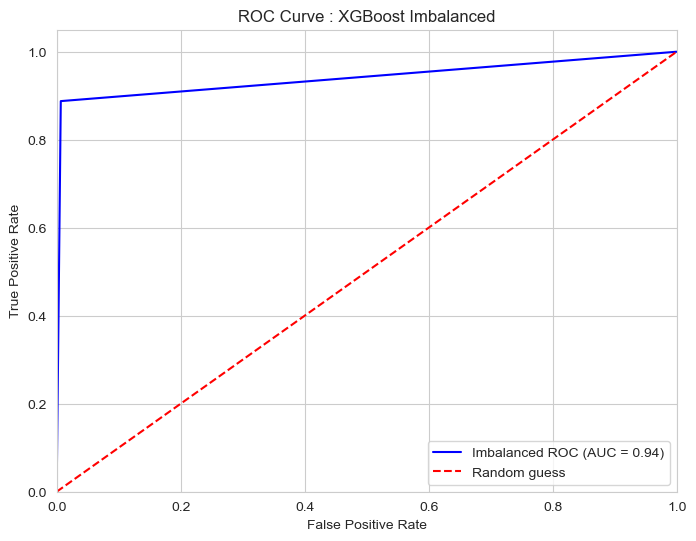

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_imb, tpr_imb, color='blue', label=f'Imbalanced ROC (AUC = {roc_auc_imb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : XGBoost Imbalanced')
plt.legend(loc="lower right")
plt.show()

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [94]:
var_imp = []
clf = grid_search.best_estimator_
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Top var = 15
2nd Top var = 11
3rd Top var = 5


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

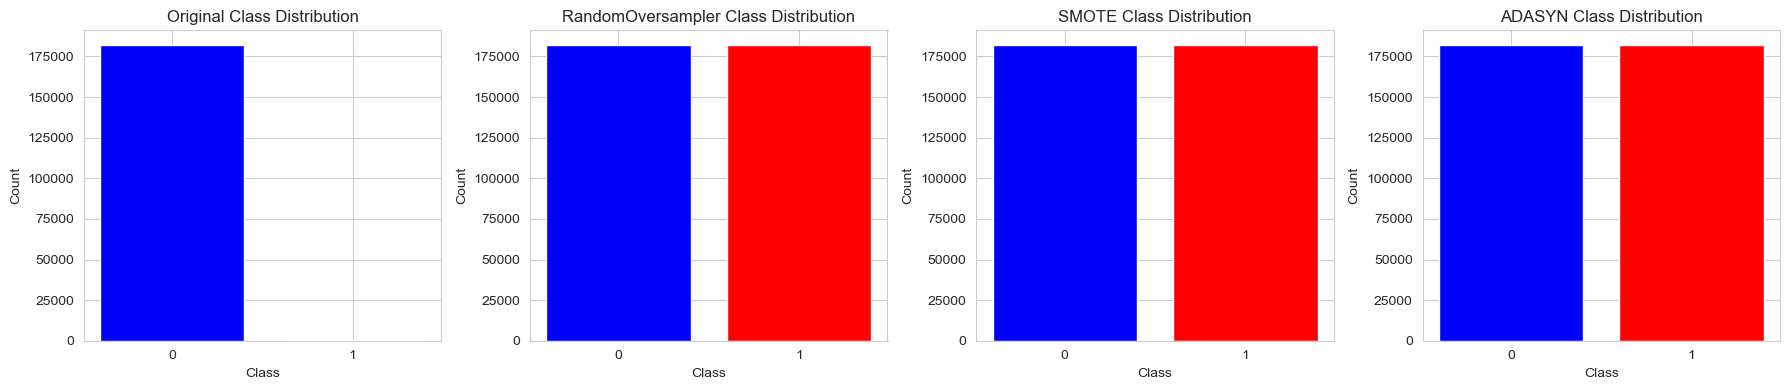

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:18:39] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:18:41] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:18:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning:

[11:18:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboos


Performance Summary:
             Sampler     Model    Recall  Precision        F1       AUC
0           Original  LogRegCV  0.873418   0.058032  0.108833  0.970193
1           Original   XGBoost  0.746835   0.951613  0.836879  0.969413
2  RandomOversampler  LogRegCV  0.873418   0.054849  0.103216  0.970797
3  RandomOversampler   XGBoost  0.797468   0.926471  0.857143  0.978098
4              SMOTE  LogRegCV  0.873418   0.052036  0.098221  0.965164
5              SMOTE   XGBoost  0.784810   0.775000  0.779874  0.965231
6             ADASYN  LogRegCV  0.873418   0.021185  0.041367  0.956061
7             ADASYN   XGBoost  0.784810   0.794872  0.789809  0.954136


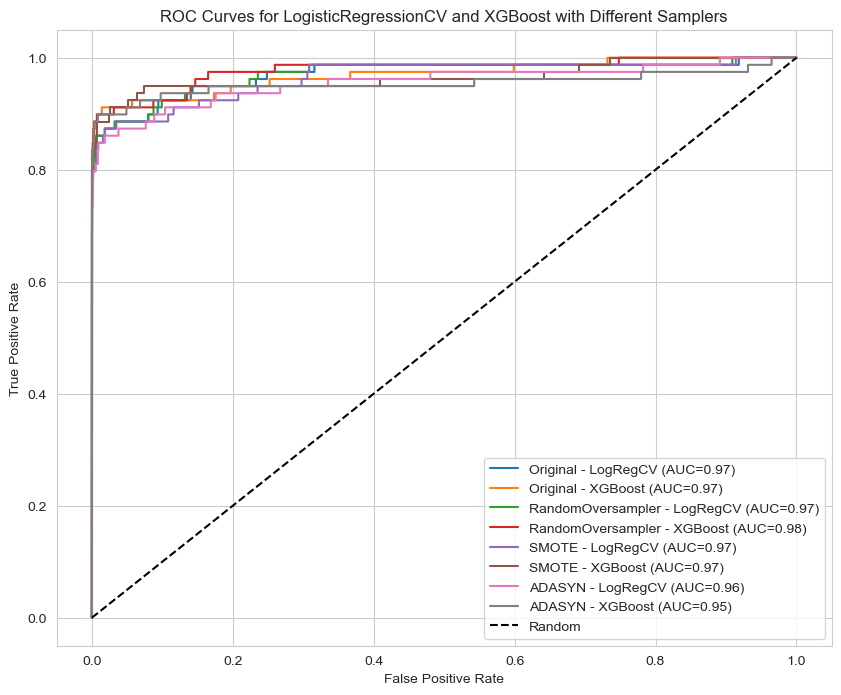

In [96]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

# 1. Split the data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2. Define samplers (including original, i.e., imbalanced)
samplers = {
    'Original': None,
    'RandomOversampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

X_sets = {'Original': X_train_cv}
y_sets = {'Original': y_train_cv}

# 3. Apply samplers and store results
for name, sampler in samplers.items():
    if sampler is not None:
        X_res, y_res = sampler.fit_resample(X_train_cv, y_train_cv)
        X_sets[name] = X_res
        y_sets[name] = y_res

# 4. Plot class distributions
fig, axes = plt.subplots(1, len(samplers), figsize=(18, 4))
for idx, (name, y_res) in enumerate(y_sets.items()):
    counts = Counter(y_res)
    axes[idx].bar(counts.keys(), counts.values(), color=['blue', 'red'])
    axes[idx].set_title(f'{name} Class Distribution')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks([0, 1])
plt.tight_layout()
plt.show()

# 5. Train and evaluate models
results = []

for name in X_sets:
    X_res, y_res = X_sets[name], y_sets[name]

    # Logistic Regression with CV
    lr = LogisticRegressionCV(
        Cs=[0.01, 0.1, 1, 10, 100, 1000],
        cv=5,
        scoring='recall',
        max_iter=1000,
        class_weight=None if name != 'Original' else 'balanced',  # Use class_weight only for imbalanced
        random_state=42,
        n_jobs=-1
    )
    lr.fit(X_res, y_res)
    y_pred_lr = lr.predict(X_test_cv)
    y_proba_lr = lr.predict_proba(X_test_cv)[:, 1]
    auc_lr = roc_auc_score(y_test_cv, y_proba_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test_cv, y_proba_lr)
    
    # XGBoost
    xgb = XGBClassifier(
        use_label_encoder=False,  # Suppress warning
        eval_metric='logloss',
        random_state=42
    )
    xgb.fit(X_res, y_res)
    y_pred_xgb = xgb.predict(X_test_cv)
    y_proba_xgb = xgb.predict_proba(X_test_cv)[:, 1]
    auc_xgb = roc_auc_score(y_test_cv, y_proba_xgb)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_cv, y_proba_xgb)
    
    # Store results
    results.append({
        'Sampler': name,
        'Model': 'LogRegCV',
        'Recall': classification_report(y_test_cv, y_pred_lr, output_dict=True)['1']['recall'],
        'Precision': classification_report(y_test_cv, y_pred_lr, output_dict=True)['1']['precision'],
        'F1': classification_report(y_test_cv, y_pred_lr, output_dict=True)['1']['f1-score'],
        'AUC': auc_lr,
        'FPR': fpr_lr,
        'TPR': tpr_lr
    })
    results.append({
        'Sampler': name,
        'Model': 'XGBoost',
        'Recall': classification_report(y_test_cv, y_pred_xgb, output_dict=True)['1']['recall'],
        'Precision': classification_report(y_test_cv, y_pred_xgb, output_dict=True)['1']['precision'],
        'F1': classification_report(y_test_cv, y_pred_xgb, output_dict=True)['1']['f1-score'],
        'AUC': auc_xgb,
        'FPR': fpr_xgb,
        'TPR': tpr_xgb
    })

# 6. Results Table
df_results = pd.DataFrame(results)
print("\nPerformance Summary:")
print(df_results[['Sampler', 'Model', 'Recall', 'Precision', 'F1', 'AUC']])

# 7. Plot ROC Curves
plt.figure(figsize=(10, 8))
for res in results:
    plt.plot(res['FPR'], res['TPR'], label=f"{res['Sampler']} - {res['Model']} (AUC={res['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LogisticRegressionCV and XGBoost with Different Samplers')
plt.legend()
plt.show()


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [99]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [100]:
class HyperparameterTuningStrategy:
    def __init__(self, search_type='grid', scoring='f1', cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42):
        self.search_type = search_type
        self.scoring = scoring
        self.cv = cv
        self.n_jobs = n_jobs
        self.verbose = verbose
        self.n_iter = n_iter
        self.random_state = random_state

    def tune(self, model, param_grid, X, y):
        if self.search_type == 'grid':
            search = GridSearchCV(
                estimator=model,
                param_grid=param_grid,
                scoring=self.scoring,
                cv=self.cv,
                n_jobs=self.n_jobs,
                verbose=self.verbose
            )
        elif self.search_type == 'random':
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grid,
                n_iter=self.n_iter,
                scoring=self.scoring,
                cv=self.cv,
                n_jobs=self.n_jobs,
                verbose=self.verbose,
                random_state=self.random_state
            )
        else:
            raise ValueError("search_type must be 'grid' or 'random'")
        search.fit(X, y)
        print(f"Best parameters: {search.best_params_}")
        print(f"Best cross-validated {self.scoring}: {search.best_score_:.4f}")
        return search.best_estimator_, search.best_params_, search.best_score_, search


In [111]:

class ModelTrainer:
    def __init__(self, X_train, y_train, X_test, y_test, samplers, models):
        """
        X_train, y_train: Original training data
        X_test, y_test: Test data
        samplers: dict of {sampler_name: sampler_instance}
        models: dict of {model_name: model_instance}
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.samplers = samplers
        self.models = models
        self.results = []
        self.y_sets = {}
        self.X_sets = {}
        self.fitted_models = {}  # Store all fitted models for later use
    
    def fit_evaluate(self, scoring_metric='f1'):
        """
        Fits and evaluates all sampler/model combinations.
        Stores results for later plotting and comparison.
        Also stores all fitted models for feature importance analysis.
        """
        self.results = []
        self.X_sets = {}
        self.y_sets = {}
        self.fitted_models = {}

        for sampler_name, sampler in self.samplers.items():
            if sampler is not None:
                X_res, y_res = sampler.fit_resample(self.X_train, self.y_train)
            else:
                X_res, y_res = self.X_train, self.y_train
            self.X_sets[sampler_name] = X_res
            self.y_sets[sampler_name] = y_res

            for model_name, model in self.models.items():
                model_copy = copy.deepcopy(model)
                model_copy.fit(X_res, y_res)
                y_pred = model_copy.predict(self.X_test)
                y_proba = model_copy.predict_proba(self.X_test)[:, 1]
                auc = roc_auc_score(self.y_test, y_proba)
                fpr, tpr, _ = roc_curve(self.y_test, y_proba)
                report = classification_report(self.y_test, y_pred, output_dict=True)
                self.results.append({
                    'Sampler': sampler_name,
                    'Model': model_name,
                    'Recall': report['1']['recall'],
                    'Precision': report['1']['precision'],
                    'F1': report['1']['f1-score'],
                    'AUC': auc,
                    'FPR': fpr,
                    'TPR': tpr
                })
                # Store fitted model for later feature importance analysis
                self.fitted_models[(sampler_name, model_name)] = model_copy
        self.df_results = pd.DataFrame(self.results)
        return self.df_results

    def plot_class_distributions(self):
        """
        Plots class distributions for all samplers.
        """
        if not self.y_sets:
            print("Run fit_evaluate() first.")
            return
        fig, axes = plt.subplots(1, len(self.samplers), figsize=(5*len(self.samplers), 4))
        if len(self.samplers) == 1:
            axes = [axes]
        for idx, (sampler_name, y_res) in enumerate(self.y_sets.items()):
            counts = Counter(y_res)
            axes[idx].bar(counts.keys(), counts.values(), color=['blue', 'red'])
            axes[idx].set_title(f'{sampler_name} Class Distribution')
            axes[idx].set_xlabel('Class')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks([0, 1])
        plt.tight_layout()
        plt.show()

    def plot_roc_comparison(self):
        """
        Plots ROC curves for all sampler/model combinations.
        """
        if not self.results:
            print("Run fit_evaluate() first.")
            return
        plt.figure(figsize=(10, 8))
        for res in self.results:
            plt.plot(res['FPR'], res['TPR'],
                     label=f"{res['Sampler']} + {res['Model']} (AUC={res['AUC']:.2f})")
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve Comparison')
        plt.legend()
        plt.show()

    def best_model(self, metric='F1'):
        """
        Returns the best sampler/model combination based on the given metric.
        """
        idx = self.df_results[metric].idxmax()
        return self.df_results.loc[idx]

    def get_best_data(self, best_sampler):
        """
        Returns the resampled X, y for the best sampler.
        """
        return self.X_sets[best_sampler], self.y_sets[best_sampler]

    def plot_final_model_roc(self, model, X_test, y_test):
        """
        Plots ROC curve for a given model and test data.
        """
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC={auc:.2f}", color='darkred')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Final Best Model')
        plt.legend()
        plt.show()

    def plot_feature_importance(self, model, feature_names=None, top_n=10, model_name=None, sampler_name=None):
        """
        Plots the top_n feature importances for a fitted model.
        Supports XGBoost and LogisticRegressionCV.
        """
        # Infer feature names if not provided
        if feature_names is None:
            feature_names = self.X_train.columns if hasattr(self.X_train, 'columns') else [f'feature_{i}' for i in range(self.X_train.shape[1])]
        
        # XGBoost
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            label = 'Importance'
        # Logistic Regression
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_.flatten())
            label = 'Absolute Coefficient'
        else:
            print("Model does not support feature importance plotting.")
            return
        
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(8, 5))
        plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
        plt.xlabel(label)
        title = f"Top {top_n} Features"
        if model_name: title += f" - {model_name}"
        if sampler_name: title += f" ({sampler_name})"
        plt.title(title)
        plt.tight_layout()
        plt.show()
        
        print("Top features:")
        print(importance_df)


In [112]:
# Example: Replace with your actual data loading/splitting code
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic imbalanced dataset for demonstration
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, 
                           n_redundant=5, n_clusters_per_class=2,
                           weights=[0.95, 0.05], flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier

samplers = {
    'Original': None,
    'RandomOversampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

models = {
    'LogRegCV': LogisticRegressionCV(
        Cs=[0.01, 0.1, 1, 10, 100, 1000],
        cv=5,
        scoring='f1',
        max_iter=1000,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}


In [113]:
trainer = ModelTrainer(X_train, y_train, X_test, y_test, samplers, models)
df_results = trainer.fit_evaluate(scoring_metric='f1')
print(df_results[['Sampler', 'Model', 'Recall', 'Precision', 'F1', 'AUC']])

             Sampler     Model  Recall  Precision        F1       AUC
0           Original  LogRegCV    0.40   0.833333  0.540541  0.886253
1           Original   XGBoost    0.62   1.000000  0.765432  0.974989
2  RandomOversampler  LogRegCV    0.84   0.295775  0.437500  0.912547
3  RandomOversampler   XGBoost    0.68   0.894737  0.772727  0.979326
4              SMOTE  LogRegCV    0.84   0.311111  0.454054  0.909389
5              SMOTE   XGBoost    0.72   0.857143  0.782609  0.967600
6             ADASYN  LogRegCV    0.82   0.219251  0.345992  0.917537
7             ADASYN   XGBoost    0.76   0.863636  0.808511  0.964505


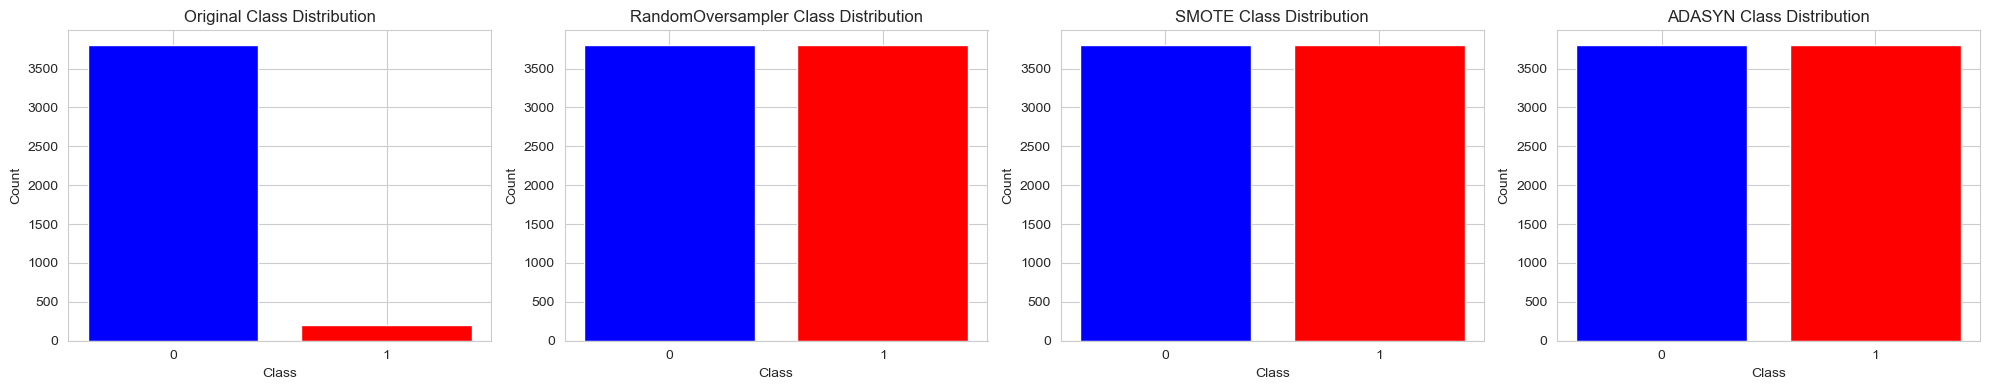

In [114]:
trainer.plot_class_distributions()

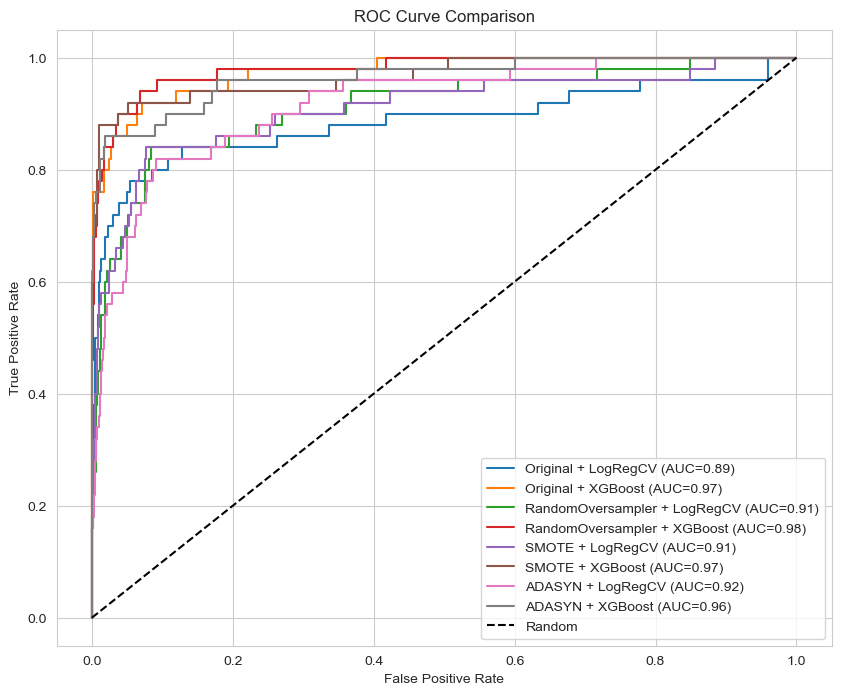

In [115]:
trainer.plot_roc_comparison()

In [116]:
best_row = trainer.best_model('F1')
print("\nBest combination based on F1:")
print(best_row)


Best combination based on F1:
Sampler                                                 ADASYN
Model                                                  XGBoost
Recall                                                    0.76
Precision                                             0.863636
F1                                                    0.808511
AUC                                                   0.964505
FPR          [0.0, 0.0, 0.0, 0.002105263157894737, 0.002105...
TPR          [0.0, 0.02, 0.6, 0.6, 0.68, 0.68, 0.74, 0.74, ...
Name: 7, dtype: object


In [117]:
tuner = HyperparameterTuningStrategy(search_type='grid', scoring='f1', cv=5)
best_sampler = best_row['Sampler']
best_model_name = best_row['Model']

X_best, y_best = trainer.get_best_data(best_sampler)
if best_model_name == 'LogRegCV':
    param_grid = {
        'Cs': [[0.001, 0.01, 0.1, 1, 10, 100, 1000]],
        'max_iter': [1000, 2000]
    }
    base_model = LogisticRegressionCV(
        cv=5,
        scoring='f1',
        class_weight=None,
        random_state=42,
        n_jobs=-1
    )
else:
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1],
        'gamma': [0, 1],
        'min_child_weight': [1, 5]
    }
    base_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

best_model, best_params, best_score, search_obj = tuner.tune(
    model=base_model,
    param_grid=param_grid,
    X=X_best,
    y=y_best
)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:07:12] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:07:12] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:07:12] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validated f1: 0.9913


Selected Sampler: ADASYN
Selected Model: XGBoost
Reason: This combination achieved the highest F1 score (0.8085) on the validation set among all sampler/model pairs.

Best Hyperparameters found during tuning:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validated f1: 0.9913

Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       950
           1       0.82      0.74      0.78        50

    accuracy                           0.98      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.98      0.98      0.98      1000

AUC: 0.9651


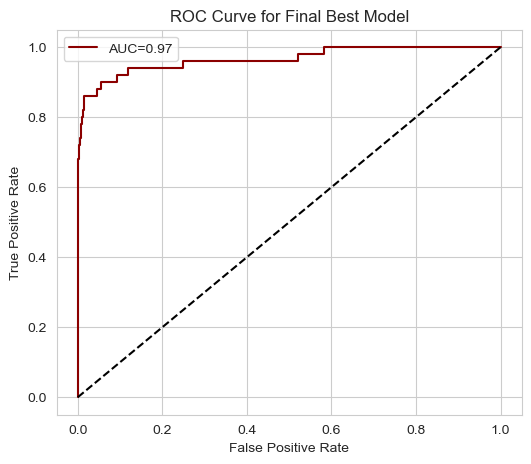

In [118]:
# Define your selection metric
selection_metric = 'F1'

# Print the selected sampler and model, and the reason
print(f"Selected Sampler: {best_sampler}")
print(f"Selected Model: {best_model_name}")
print(f"Reason: This combination achieved the highest {selection_metric} score "
      f"({best_row[selection_metric]:.4f}) on the validation set among all sampler/model pairs.\n")

# Print best hyperparameters found
print("Best Hyperparameters found during tuning:")
print(best_params)
print(f"Best cross-validated {tuner.scoring}: {best_score:.4f}\n")

# Final test set evaluation
print("Final Model Performance on Test Set:")
y_pred_final = best_model.predict(X_test)
y_proba_final = best_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_final))
print(f"AUC: {roc_auc_score(y_test, y_proba_final):.4f}")

# Plot ROC for the final model
trainer.plot_final_model_roc(best_model, X_test, y_test)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Please refer above
# perform the best oversampling method on X_train & y_train

# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit( ) # fit on the balanced dataset
# print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

# Feature importance with the all selected models


Feature importance for Original + LogRegCV:


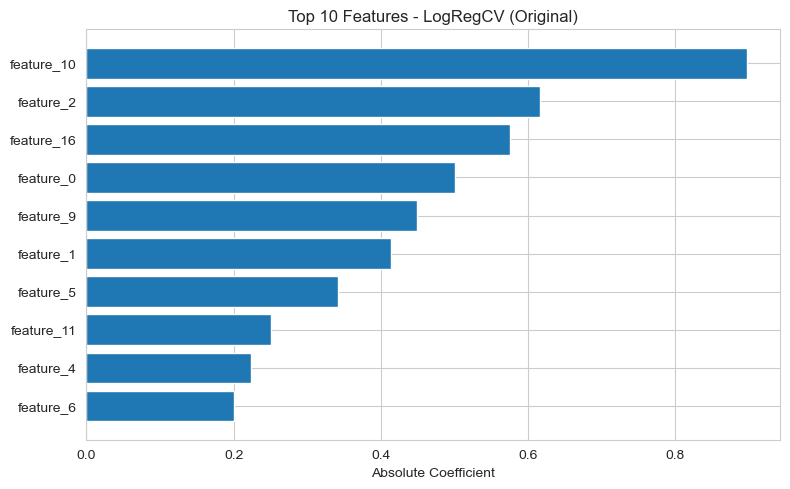

Top features:
       Feature  Importance
10  feature_10    0.898056
2    feature_2    0.616755
16  feature_16    0.576079
0    feature_0    0.500587
9    feature_9    0.448891
1    feature_1    0.414058
5    feature_5    0.342466
11  feature_11    0.250400
4    feature_4    0.224174
6    feature_6    0.201229

Feature importance for Original + XGBoost:


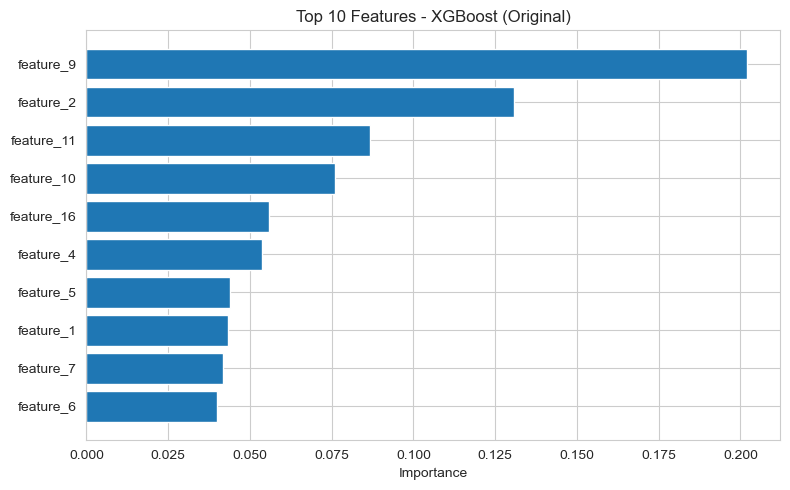

Top features:
       Feature  Importance
9    feature_9    0.202015
2    feature_2    0.130645
11  feature_11    0.086596
10  feature_10    0.076163
16  feature_16    0.055732
4    feature_4    0.053619
5    feature_5    0.044016
1    feature_1    0.043238
7    feature_7    0.041878
6    feature_6    0.039790

Feature importance for RandomOversampler + LogRegCV:


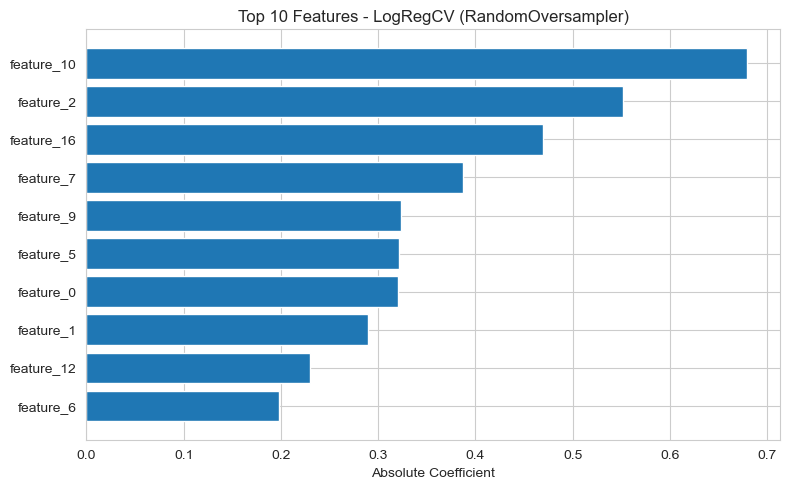

Top features:
       Feature  Importance
10  feature_10    0.679399
2    feature_2    0.552313
16  feature_16    0.469528
7    feature_7    0.386852
9    feature_9    0.323209
5    feature_5    0.321517
0    feature_0    0.320211
1    feature_1    0.289092
12  feature_12    0.230383
6    feature_6    0.198418

Feature importance for RandomOversampler + XGBoost:


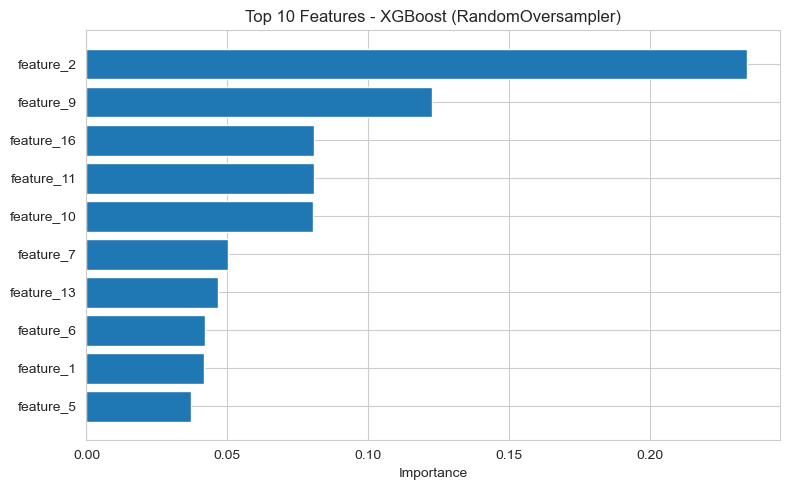

Top features:
       Feature  Importance
2    feature_2    0.234528
9    feature_9    0.122750
16  feature_16    0.080951
11  feature_11    0.080616
10  feature_10    0.080549
7    feature_7    0.050326
13  feature_13    0.046838
6    feature_6    0.042064
1    feature_1    0.041748
5    feature_5    0.037016

Feature importance for SMOTE + LogRegCV:


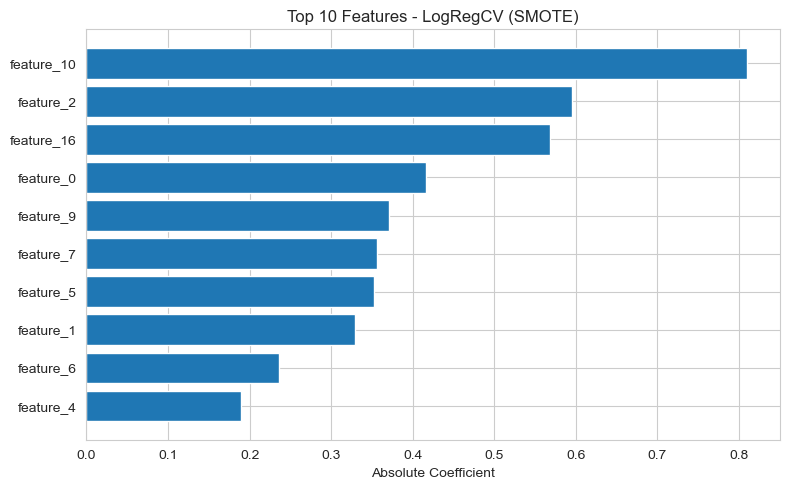

Top features:
       Feature  Importance
10  feature_10    0.809971
2    feature_2    0.595350
16  feature_16    0.568389
0    feature_0    0.416677
9    feature_9    0.370994
7    feature_7    0.355858
5    feature_5    0.352246
1    feature_1    0.329682
6    feature_6    0.236661
4    feature_4    0.189783

Feature importance for SMOTE + XGBoost:


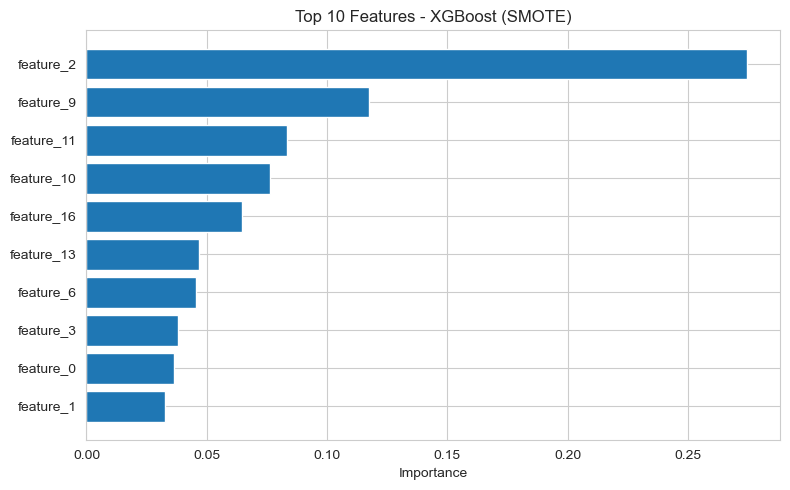

Top features:
       Feature  Importance
2    feature_2    0.274516
9    feature_9    0.117557
11  feature_11    0.083382
10  feature_10    0.076426
16  feature_16    0.064572
13  feature_13    0.046672
6    feature_6    0.045501
3    feature_3    0.037879
0    feature_0    0.036421
1    feature_1    0.032506

Feature importance for ADASYN + LogRegCV:


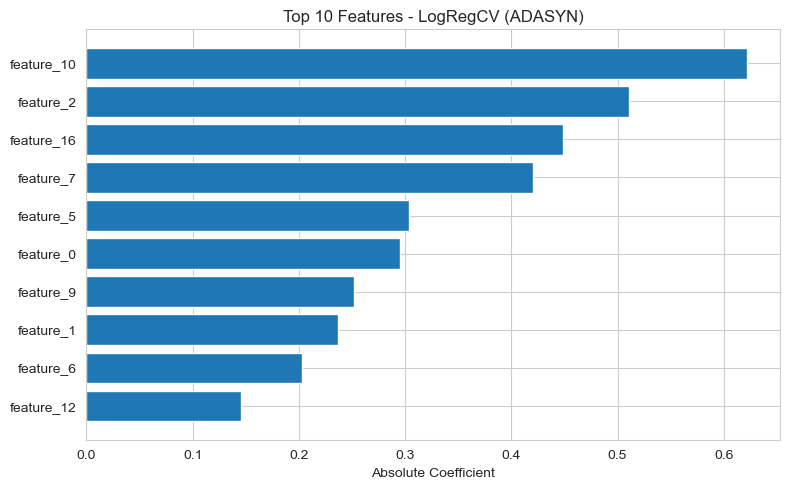

Top features:
       Feature  Importance
10  feature_10    0.621861
2    feature_2    0.510955
16  feature_16    0.448516
7    feature_7    0.420822
5    feature_5    0.304092
0    feature_0    0.295522
9    feature_9    0.252206
1    feature_1    0.237145
6    feature_6    0.202527
12  feature_12    0.145054

Feature importance for ADASYN + XGBoost:


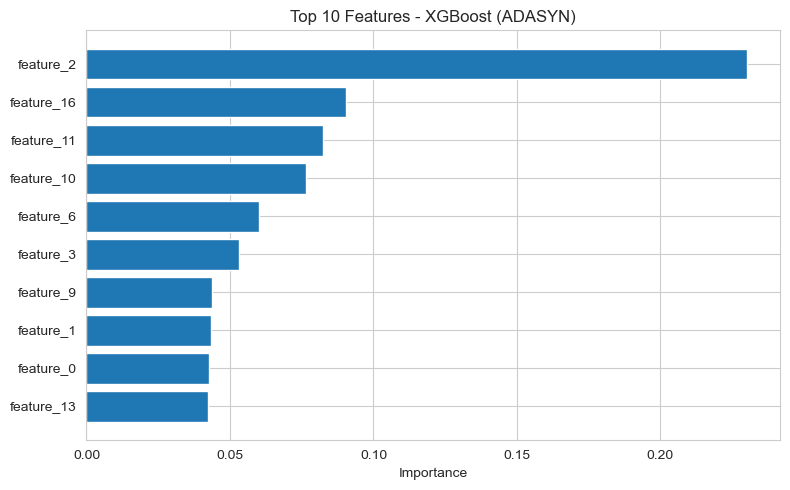

Top features:
       Feature  Importance
2    feature_2    0.230162
16  feature_16    0.090506
11  feature_11    0.082428
10  feature_10    0.076353
6    feature_6    0.060078
3    feature_3    0.052993
9    feature_9    0.043663
1    feature_1    0.043530
0    feature_0    0.042665
13  feature_13    0.042248


In [119]:
for (sampler_name, model_name), model in trainer.fitted_models.items():
    print(f"\nFeature importance for {sampler_name} + {model_name}:")
    trainer.plot_feature_importance(model, model_name=model_name, sampler_name=sampler_name)

# Print the important features of the best model to understand the dataset

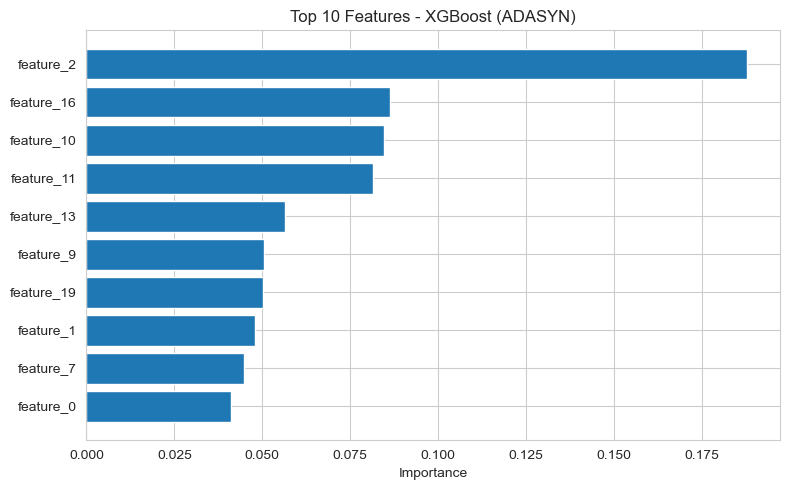

Top features:
       Feature  Importance
2    feature_2    0.187818
16  feature_16    0.086336
10  feature_10    0.084558
11  feature_11    0.081521
13  feature_13    0.056492
9    feature_9    0.050598
19  feature_19    0.050192
1    feature_1    0.048043
7    feature_7    0.044780
0    feature_0    0.041093


In [120]:
trainer.plot_feature_importance(best_model, model_name=best_model_name, sampler_name=best_sampler)

Threshold	FPR	TPR
inf	0.0000	0.0000
1.0000	0.0000	0.0200
0.8940	0.0000	0.6600
0.8798	0.0011	0.6600
0.8564	0.0011	0.6800
0.8374	0.0032	0.6800
0.6828	0.0032	0.7200
0.5657	0.0063	0.7200
0.5181	0.0063	0.7400
0.5096	0.0084	0.7400
0.4683	0.0084	0.7800
0.3902	0.0105	0.7800
0.3808	0.0105	0.8000
0.3724	0.0116	0.8000
0.3564	0.0116	0.8200
0.2997	0.0137	0.8200
0.2588	0.0137	0.8400
0.2393	0.0158	0.8400
0.1787	0.0158	0.8600
0.0352	0.0463	0.8600
0.0344	0.0463	0.8800
0.0220	0.0558	0.8800
0.0202	0.0558	0.9000
0.0090	0.0916	0.9000
0.0088	0.0916	0.9200
0.0053	0.1179	0.9200
0.0052	0.1179	0.9400
0.0012	0.2495	0.9400
0.0012	0.2495	0.9600
0.0001	0.5211	0.9600
0.0001	0.5211	0.9800
0.0001	0.5832	0.9800
0.0001	0.5832	1.0000
0.0000	1.0000	1.0000

Best Threshold (Youden's J): 0.0202
At Best Threshold: FPR=0.0558, TPR=0.9000


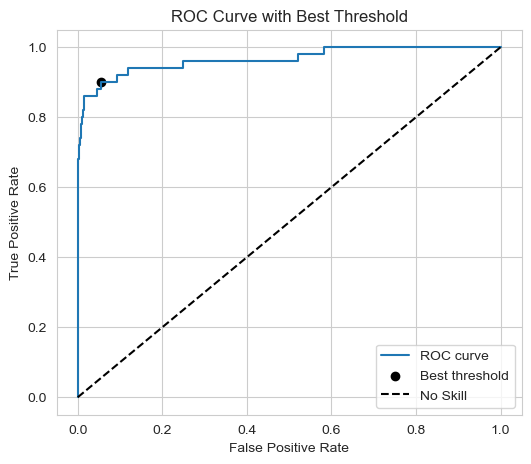

In [121]:
#### Print the FPR,TPR & select the best threshold from the roc curve


from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
y_proba_final = best_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)

# Print FPR, TPR, Thresholds
print("Threshold\tFPR\tTPR")
for thr, fp, tp in zip(thresholds, fpr, tpr):
    print(f"{thr:.4f}\t{fp:.4f}\t{tp:.4f}")

# Select the best threshold using Youden's J statistic (TPR - FPR)
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]
print(f"\nBest Threshold (Youden's J): {best_threshold:.4f}")
print(f"At Best Threshold: FPR={fpr[ix]:.4f}, TPR={tpr[ix]:.4f}")

# Optional: Plot ROC and mark the best threshold
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.show()

In [122]:
#Please refer above for the best Threshod.

# print('Train auc =', metrics.roc_auc_score(_________)
# fpr, tpr, thresholds = metrics.roc_curve(_________)

threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.020153152
